In [ ]:
#new
import json
import pandas as pd

file_path = "/content/hin_train.json"

# Try loading as a single JSON
try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ Loaded as standard JSON format.")
except json.JSONDecodeError:
    # Fallback: load as JSONL (line-separated JSON)
    print("⚠️ Detected JSON Lines format, loading line by line...")
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Print info
print("\n📊 Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {list(df.columns)}")

# Show sample
print("\n🔹 Sample Rows:")
print(df.head())


⚠️ Detected JSON Lines format, loading line by line...

📊 Dataset Info:
Number of rows: 1299155
Number of columns: 5
Column names: ['unique_identifier', 'native word', 'english word', 'source', 'score']

🔹 Sample Rows:
  unique_identifier native word english word    source  score
0              hin1    जन्मदिवस   janamdivas  Dakshina    NaN
1              hin2       रक्खा        rakha  Dakshina    NaN
2              hin3    मिलीजुली     milijuli  Dakshina    NaN
3              hin4      जांचों     jaanchon  Dakshina    NaN
4              hin5       चमकता     chamkata  Dakshina    NaN


/tmp/ipython-input-2641811471.py:81: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2641811471.py:81: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2641811471.py:81: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2641811471.py:81: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2641811471.py:81: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2641811471.py:81: UserWarning: Glyph 2364 (\N{DEVANAGARI SIGN NUKTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2641811471.py:81: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

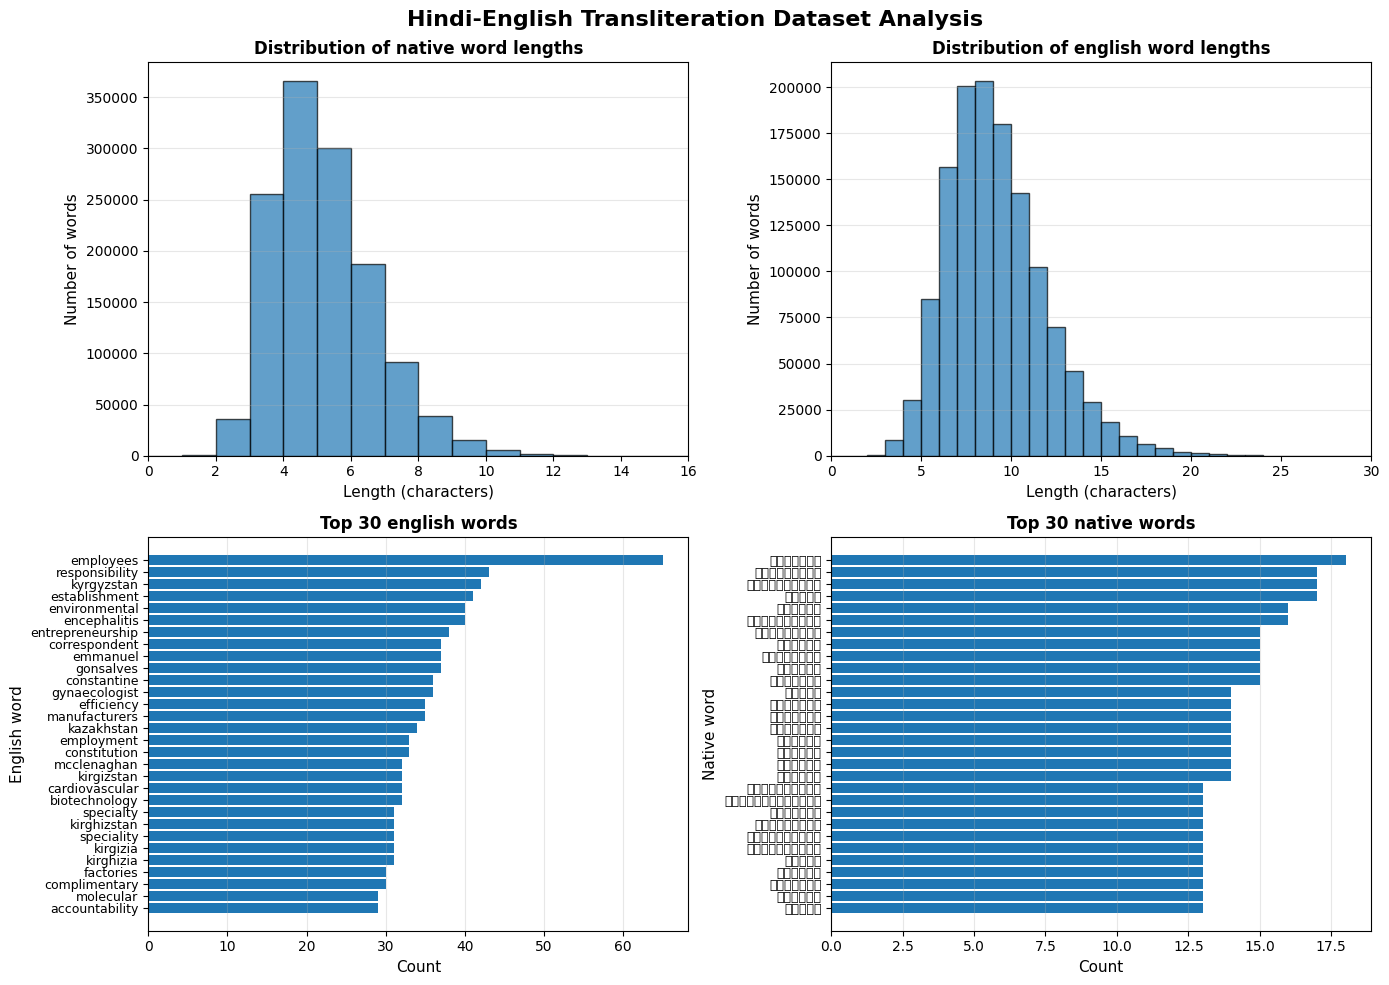


DATASET SUMMARY STATISTICS
Total records: 1,299,155

Native word length (visual characters):
  Mean: 4.70 characters
  Median: 4.00 characters
  Min: 1 characters
  Max: 15 characters

English word length:
  Mean: 8.69 characters
  Median: 8.00 characters
  Min: 1 characters
  Max: 32 characters

Unique native words: 1,153,756
Unique english words: 1,064,180

Data sources: 6
source
IndicCorp     956190
Samanantar    152778
Existing      131773
Dakshina       24727
Wikidata       24528
AK-Freq         9159
Name: count, dtype: int64

Length difference (English - Hindi):
  Mean: 3.99 characters
  Median: 4.00 characters


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unicodedata

# Function to count actual visual characters (grapheme clusters)
def get_visual_length(text):
    """Count visual characters, treating combining marks as part of base character"""
    if pd.isna(text):
        return 0
    # Normalize to NFC form (composed form)
    text = unicodedata.normalize('NFC', text)
    # Count only non-combining characters
    count = 0
    for char in text:
        if unicodedata.category(char) not in ['Mn', 'Mc', 'Me']:  # Skip combining marks
            count += 1
    return count

# Load the data (assuming JSONL format)
#/content/hin_trained.json
file_path = "/content/hin_train.json"
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            data.append(json.loads(line))

df = pd.DataFrame(data)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hindi-English Transliteration Dataset Analysis', fontsize=16, fontweight='bold')

# Calculate lengths using visual character count for Hindi
native_lengths = df['native word'].apply(get_visual_length)
english_lengths = df['english word'].str.len()

# 1. Distribution of native word lengths
axes[0, 0].hist(native_lengths, bins=range(0, native_lengths.max()+2),
                color='#1f77b4', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Length (characters)', fontsize=11)
axes[0, 0].set_ylabel('Number of words', fontsize=11)
axes[0, 0].set_title('Distribution of native word lengths', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_xlim(0, min(30, native_lengths.max()+1))

# 2. Distribution of english word lengths
axes[0, 1].hist(english_lengths, bins=range(0, english_lengths.max()+2),
                color='#1f77b4', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Length (characters)', fontsize=11)
axes[0, 1].set_ylabel('Number of words', fontsize=11)
axes[0, 1].set_title('Distribution of english word lengths', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_xlim(0, min(30, english_lengths.max()+1))

# 3. Top 30 most frequent english words
top_english = df['english word'].value_counts().head(30)
axes[1, 0].barh(range(len(top_english)), top_english.values, color='#1f77b4')
axes[1, 0].set_yticks(range(len(top_english)))
axes[1, 0].set_yticklabels(top_english.index, fontsize=9)
axes[1, 0].set_xlabel('Count', fontsize=11)
axes[1, 0].set_ylabel('English word', fontsize=11)
axes[1, 0].set_title('Top 30 english words', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Top 30 most frequent native words
top_native = df['native word'].value_counts().head(30)
axes[1, 1].barh(range(len(top_native)), top_native.values, color='#1f77b4')
axes[1, 1].set_yticks(range(len(top_native)))
axes[1, 1].set_yticklabels(top_native.index, fontsize=9)
axes[1, 1].set_xlabel('Count', fontsize=11)
axes[1, 1].set_ylabel('Native word', fontsize=11)
axes[1, 1].set_title('Top 30 native words', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("DATASET SUMMARY STATISTICS")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"\nNative word length (visual characters):")
print(f"  Mean: {native_lengths.mean():.2f} characters")
print(f"  Median: {native_lengths.median():.2f} characters")
print(f"  Min: {native_lengths.min()} characters")
print(f"  Max: {native_lengths.max()} characters")
print(f"\nEnglish word length:")
print(f"  Mean: {english_lengths.mean():.2f} characters")
print(f"  Median: {english_lengths.median():.2f} characters")
print(f"  Min: {english_lengths.min()} characters")
print(f"  Max: {english_lengths.max()} characters")
print(f"\nUnique native words: {df['native word'].nunique():,}")
print(f"Unique english words: {df['english word'].nunique():,}")
print(f"\nData sources: {df['source'].nunique()}")
print(df['source'].value_counts())

# Additional analysis: Length comparison
length_diff = english_lengths - native_lengths
print(f"\nLength difference (English - Hindi):")
print(f"  Mean: {length_diff.mean():.2f} characters")
print(f"  Median: {length_diff.median():.2f} characters")
print("="*60)

In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
file_path = "/content/hin_train.json"
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            data.append(json.loads(line))

df = pd.DataFrame(data)
print(f"Original dataset size: {len(df):,} rows")

# Create stratification features to maintain distribution
# 1. Word length bins for native words
df['native_length_bin'] = pd.cut(df['native word'].str.len(),
                                   bins=[0, 5, 10, 15, 20, 100],
                                   labels=['0-5', '6-10', '11-15', '16-20', '20+'])

# 2. Word length bins for english words
df['english_length_bin'] = pd.cut(df['english word'].str.len(),
                                    bins=[0, 5, 10, 15, 20, 100],
                                    labels=['0-5', '6-10', '11-15', '16-20', '20+'])

# 3. Create combined stratification column
df['strata'] = df['source'].astype(str) + '_' + \
               df['native_length_bin'].astype(str) + '_' + \
               df['english_length_bin'].astype(str)

print(f"\nNumber of unique strata: {df['strata'].nunique()}")
print(f"Strata distribution (top 10):")
print(df['strata'].value_counts().head(10))

# Perform stratified sampling
sample_size = 100000
sampling_fraction = sample_size / len(df)

print(f"\nSampling {sample_size:,} rows (≈{sampling_fraction*100:.2f}% of original)")

# Stratified sampling
sampled_df = df.groupby('strata', group_keys=False).apply(
    lambda x: x.sample(frac=sampling_fraction, random_state=42)
    if len(x) > 1 else x
)

# If we don't have exactly 100k, adjust
if len(sampled_df) < sample_size:
    # Need more samples
    remaining = sample_size - len(sampled_df)
    additional = df[~df.index.isin(sampled_df.index)].sample(n=remaining, random_state=42)
    sampled_df = pd.concat([sampled_df, additional])
elif len(sampled_df) > sample_size:
    # Need fewer samples
    sampled_df = sampled_df.sample(n=sample_size, random_state=42)

# Remove helper columns
sampled_df = sampled_df.drop(columns=['native_length_bin', 'english_length_bin', 'strata'])

print(f"\n✅ Sampled dataset size: {len(sampled_df):,} rows")

# Compare distributions
print("\n" + "="*70)
print("DISTRIBUTION COMPARISON")
print("="*70)

print("\n📊 Source Distribution:")
print(f"{'Source':<15} {'Original %':<15} {'Sample %':<15} {'Difference':<15}")
print("-" * 70)
for source in df['source'].unique():
    orig_pct = (df['source'] == source).sum() / len(df) * 100
    samp_pct = (sampled_df['source'] == source).sum() / len(sampled_df) * 100
    diff = abs(orig_pct - samp_pct)
    print(f"{source:<15} {orig_pct:>13.2f}% {samp_pct:>13.2f}% {diff:>13.3f}%")

print("\n📊 Native Word Length Statistics:")
orig_native_len = df['native word'].str.len()
samp_native_len = sampled_df['native word'].str.len()
print(f"{'Metric':<15} {'Original':<15} {'Sample':<15} {'Difference':<15}")
print("-" * 70)
print(f"{'Mean':<15} {orig_native_len.mean():>13.2f} {samp_native_len.mean():>13.2f} {abs(orig_native_len.mean()-samp_native_len.mean()):>13.3f}")
print(f"{'Median':<15} {orig_native_len.median():>13.2f} {samp_native_len.median():>13.2f} {abs(orig_native_len.median()-samp_native_len.median()):>13.3f}")
print(f"{'Std Dev':<15} {orig_native_len.std():>13.2f} {samp_native_len.std():>13.2f} {abs(orig_native_len.std()-samp_native_len.std()):>13.3f}")

print("\n📊 English Word Length Statistics:")
orig_english_len = df['english word'].str.len()
samp_english_len = sampled_df['english word'].str.len()
print(f"{'Metric':<15} {'Original':<15} {'Sample':<15} {'Difference':<15}")
print("-" * 70)
print(f"{'Mean':<15} {orig_english_len.mean():>13.2f} {samp_english_len.mean():>13.2f} {abs(orig_english_len.mean()-samp_english_len.mean()):>13.3f}")
print(f"{'Median':<15} {orig_english_len.median():>13.2f} {samp_english_len.median():>13.2f} {abs(orig_english_len.median()-samp_english_len.median()):>13.3f}")
print(f"{'Std Dev':<15} {orig_english_len.std():>13.2f} {samp_english_len.std():>13.2f} {abs(orig_english_len.std()-samp_english_len.std()):>13.3f}")

print("="*70)

# Save the sampled data
output_file = "/content/hin_train_100k_sample.json"

# Save as JSONL format (same as original)
with open(output_file, 'w', encoding='utf-8') as f:
    for _, row in sampled_df.iterrows():
        json_line = json.dumps(row.to_dict(), ensure_ascii=False)
        f.write(json_line + '\n')

print(f"\n✅ Sampled dataset saved to: {output_file}")

# Also save as CSV for easy viewing (optional)
csv_file = "/content/hin_train_100k_sample.csv"
sampled_df.to_csv(csv_file, index=False, encoding='utf-8')
print(f"✅ Also saved as CSV: {csv_file}")

print("\n🎉 Sampling complete!")

Original dataset size: 1,299,155 rows

Number of unique strata: 96
Strata distribution (top 10):
strata
IndicCorp_6-10_6-10      524939
IndicCorp_6-10_11-15     114011
IndicCorp_11-15_11-15    103439
IndicCorp_0-5_6-10        94438
Samanantar_6-10_6-10      86099
Existing_6-10_6-10        68576
IndicCorp_0-5_0-5         45598
IndicCorp_6-10_0-5        27995
Existing_0-5_6-10         23034
IndicCorp_11-15_6-10      19595
Name: count, dtype: int64

Sampling 100,000 rows (≈7.70% of original)


/tmp/ipython-input-2178780517.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('strata', group_keys=False).apply(



✅ Sampled dataset size: 100,000 rows

DISTRIBUTION COMPARISON

📊 Source Distribution:
Source          Original %      Sample %        Difference     
----------------------------------------------------------------------
Dakshina                 1.90%          1.90%         0.002%
AK-Freq                  0.70%          0.71%         0.001%
Existing                10.14%         10.14%         0.000%
Wikidata                 1.89%          1.89%         0.000%
Samanantar              11.76%         11.76%         0.002%
IndicCorp               73.60%         73.60%         0.001%

📊 Native Word Length Statistics:
Metric          Original        Sample          Difference     
----------------------------------------------------------------------
Mean                     7.79          7.79         0.003
Median                   7.00          7.00         0.000
Std Dev                  2.51          2.51         0.000

📊 English Word Length Statistics:
Metric          Original        Sa

/tmp/ipython-input-1071667378.py:80: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1071667378.py:80: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-1071667378.py:80: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1071667378.py:80: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1071667378.py:80: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1071667378.py:80: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1071667378.py:80: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/i

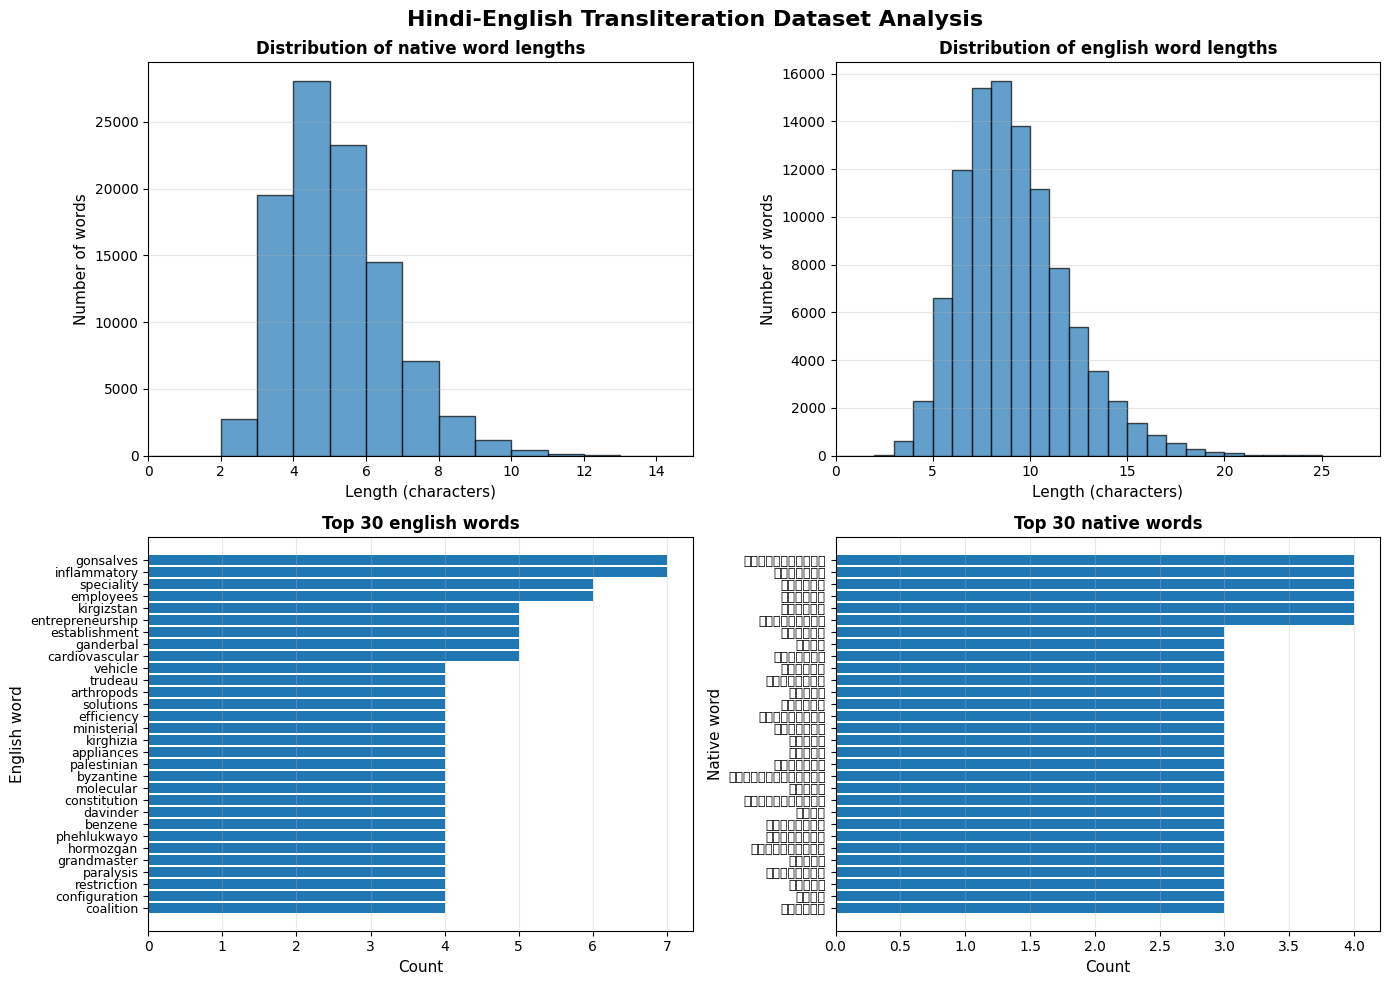


DATASET SUMMARY STATISTICS
Total records: 100,000

Native word length (visual characters):
  Mean: 4.70 characters
  Median: 4.00 characters
  Min: 1 characters
  Max: 14 characters

English word length:
  Mean: 8.69 characters
  Median: 8.00 characters
  Min: 1 characters
  Max: 27 characters

Unique native words: 98,462
Unique english words: 97,334

Data sources: 6
source
IndicCorp     73600
Samanantar    11762
Existing      10143
Dakshina       1901
Wikidata       1888
AK-Freq         706
Name: count, dtype: int64

Length difference (English - Hindi):
  Mean: 3.99 characters
  Median: 4.00 characters


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unicodedata

# Function to count actual visual characters (grapheme clusters)
def get_visual_length(text):
    """Count visual characters, treating combining marks as part of base character"""
    if pd.isna(text):
        return 0
    # Normalize to NFC form (composed form)
    text = unicodedata.normalize('NFC', text)
    # Count only non-combining characters
    count = 0
    for char in text:
        if unicodedata.category(char) not in ['Mn', 'Mc', 'Me']:  # Skip combining marks
            count += 1
    return count

# Load the data (assuming JSONL format)
file_path = "/content/hin_train_100k_sample.json"
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            data.append(json.loads(line))

df = pd.DataFrame(data)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hindi-English Transliteration Dataset Analysis', fontsize=16, fontweight='bold')

# Calculate lengths using visual character count for Hindi
native_lengths = df['native word'].apply(get_visual_length)
english_lengths = df['english word'].str.len()

# 1. Distribution of native word lengths
axes[0, 0].hist(native_lengths, bins=range(0, native_lengths.max()+2),
                color='#1f77b4', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Length (characters)', fontsize=11)
axes[0, 0].set_ylabel('Number of words', fontsize=11)
axes[0, 0].set_title('Distribution of native word lengths', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_xlim(0, min(30, native_lengths.max()+1))

# 2. Distribution of english word lengths
axes[0, 1].hist(english_lengths, bins=range(0, english_lengths.max()+2),
                color='#1f77b4', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Length (characters)', fontsize=11)
axes[0, 1].set_ylabel('Number of words', fontsize=11)
axes[0, 1].set_title('Distribution of english word lengths', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_xlim(0, min(30, english_lengths.max()+1))

# 3. Top 30 most frequent english words
top_english = df['english word'].value_counts().head(30)
axes[1, 0].barh(range(len(top_english)), top_english.values, color='#1f77b4')
axes[1, 0].set_yticks(range(len(top_english)))
axes[1, 0].set_yticklabels(top_english.index, fontsize=9)
axes[1, 0].set_xlabel('Count', fontsize=11)
axes[1, 0].set_ylabel('English word', fontsize=11)
axes[1, 0].set_title('Top 30 english words', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Top 30 most frequent native words
top_native = df['native word'].value_counts().head(30)
axes[1, 1].barh(range(len(top_native)), top_native.values, color='#1f77b4')
axes[1, 1].set_yticks(range(len(top_native)))
axes[1, 1].set_yticklabels(top_native.index, fontsize=9)
axes[1, 1].set_xlabel('Count', fontsize=11)
axes[1, 1].set_ylabel('Native word', fontsize=11)
axes[1, 1].set_title('Top 30 native words', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("DATASET SUMMARY STATISTICS")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"\nNative word length (visual characters):")
print(f"  Mean: {native_lengths.mean():.2f} characters")
print(f"  Median: {native_lengths.median():.2f} characters")
print(f"  Min: {native_lengths.min()} characters")
print(f"  Max: {native_lengths.max()} characters")
print(f"\nEnglish word length:")
print(f"  Mean: {english_lengths.mean():.2f} characters")
print(f"  Median: {english_lengths.median():.2f} characters")
print(f"  Min: {english_lengths.min()} characters")
print(f"  Max: {english_lengths.max()} characters")
print(f"\nUnique native words: {df['native word'].nunique():,}")
print(f"Unique english words: {df['english word'].nunique():,}")
print(f"\nData sources: {df['source'].nunique()}")
print(df['source'].value_counts())

# Additional analysis: Length comparison
length_diff = english_lengths - native_lengths
print(f"\nLength difference (English - Hindi):")
print(f"  Mean: {length_diff.mean():.2f} characters")
print(f"  Median: {length_diff.median():.2f} characters")
print("="*60)

In [ ]:
import json
import pandas as pd

file_path = "/content/hin_valid.json"

# Try loading as a single JSON
try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ Loaded as standard JSON format.")
except json.JSONDecodeError:
    # Fallback: load as JSONL (line-separated JSON)
    print("⚠️ Detected JSON Lines format, loading line by line...")
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Print info
print("\n📊 Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {list(df.columns)}")

# Show sample
print("\n🔹 Sample Rows:")
print(df.head())


⚠️ Detected JSON Lines format, loading line by line...

📊 Dataset Info:
Number of rows: 6357
Number of columns: 5
Column names: ['unique_identifier', 'native word', 'english word', 'source', 'score']

🔹 Sample Rows:
  unique_identifier native word english word    source  score
0              hin1      स्पाइक        spike  Wikidata    NaN
1              hin2     त्रिलोक       trilok  Wikidata    NaN
2              hin3        चंदा       chanda  Wikidata    NaN
3              hin4        मीता        meeta  Wikidata    NaN
4              hin5         जैक         jack  Wikidata    NaN


In [ ]:
import json
import pandas as pd

file_path = "/content/hin_test.json"

# Try loading as a single JSON
try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ Loaded as standard JSON format.")
except json.JSONDecodeError:
    # Fallback: load as JSONL (line-separated JSON)
    print("⚠️ Detected JSON Lines format, loading line by line...")
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Print info
print("\n📊 Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {list(df.columns)}")

# Show sample
print("\n🔹 Sample Rows:")
print(df.head())


⚠️ Detected JSON Lines format, loading line by line...

📊 Dataset Info:
Number of rows: 10112
Number of columns: 4
Column names: ['unique_identifier', 'native word', 'english word', 'source']

🔹 Sample Rows:
  unique_identifier      native word    english word   source
0              hin1    मैट्रोलॉजिस्ट    maitrologist  AK-Freq
1              hin2  पीएचडब्ल्यूसीएस           phwcs  AK-Freq
2              hin3  प्रतिद्वन्दियों  pratidwandiyon  AK-Freq
3              hin4      प्रतियुक्ति      pratiyukti  AK-Freq
4              hin5       एक्सिसटेंस      eksisatens  AK-Freq


In [ ]:
#new
import json
import pandas as pd

file_path = "/content/hin_train_100k_sample.json"

# Try loading as a single JSON
try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ Loaded as standard JSON format.")
except json.JSONDecodeError:
    # Fallback: load as JSONL (line-separated JSON)
    print("⚠️ Detected JSON Lines format, loading line by line...")
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Print info
print("\n📊 Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {list(df.columns)}")

# Show sample
print("\n🔹 Sample Rows:")
print(df.head())


⚠️ Detected JSON Lines format, loading line by line...

📊 Dataset Info:
Number of rows: 100000
Number of columns: 5
Column names: ['unique_identifier', 'native word', 'english word', 'source', 'score']

🔹 Sample Rows:
  unique_identifier native word english word     source     score
0         hin505401  वायुमार्गो    vayumargo  IndicCorp -0.101368
1        hin1136458   प्रह्मलाद   prahmalaad  IndicCorp -0.131813
2          hin15978    सीताकुंड     sitakund   Dakshina       NaN
3          hin99452    टाहलीआणा   tahaliaana   Existing       NaN
4         hin406277    मंगवाएगी  mangvaayegi  IndicCorp -0.165073


In [ ]:
# Cell 1: imports & device & HP
import os
import json
import math
import random
from pathlib import Path
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# ================================
# HYPERPARAMETERS
# ================================
HP = {
    # Paths (adjust if your files are in different locations)

    #/content/hin/hin_train.json
    "train_path": "/content/hin_train_100k_sample.json",
    "valid_path": "/content/hin_valid.json",
    "test_path": "/content/hin_test.json",

    # Model architecture
    "d_model": 512,
    "nhead": 8,
    "num_encoder_layers": 2,
    "num_decoder_layers": 2,
    "dim_feedforward": 2048,
    "dropout": 0.1,
    "activation": "relu",
    "max_seq_length": 128,

    # Training
    "batch_size": 128,
    "learning_rate": 5e-4,
    "num_epochs": 20,
    "warmup_steps": 4000,
    "label_smoothing": 0.1,
    "max_target_len": 64,
    "grad_clip": 1.0,

    # Inference
    "beam_size": 5,
    "length_penalty": 0.6,

    # Other
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "save_path": "/content/best_transformer_model.pt",
    "seed": 42,
}

# enforce constraints
HP["num_encoder_layers"] = min(HP["num_encoder_layers"], 2)
HP["num_decoder_layers"] = min(HP["num_decoder_layers"], 2)

# reproducibility
torch.manual_seed(HP["seed"])
np.random.seed(HP["seed"])
random.seed(HP["seed"])
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(HP["seed"])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

print("Device:", HP["device"])


Device: cuda


In [ ]:
# Cell 2: utilities
def levenshtein(a: str, b: str) -> int:
    """Compute Levenshtein distance between two strings."""
    if a == b:
        return 0
    la, lb = len(a), len(b)
    if la == 0:
        return lb
    if lb == 0:
        return la
    prev = list(range(lb + 1))
    for i, ca in enumerate(a, start=1):
        cur = [i] + [0] * lb
        for j, cb in enumerate(b, start=1):
            add = prev[j] + 1
            delete = cur[j - 1] + 1
            replace = prev[j - 1] + (0 if ca == cb else 1)
            cur[j] = min(add, delete, replace)
        prev = cur
    return prev[lb]


In [ ]:
# Cell 3: dataset and collate
class TranslitDataset(Dataset):
    def __init__(self, df: pd.DataFrame, src_vocab: Dict[str,int],
                 tgt_vocab: Dict[str,int], max_tgt_len: int):
        self.srcs = df["english word"].astype(str).tolist()
        self.tgts = df["native word"].astype(str).tolist()
        self.src_vocab = src_vocab
        self.tgt_vocab = tgt_vocab
        self.max_tgt_len = max_tgt_len

    def __len__(self):
        return len(self.srcs)

    def encode_src(self, s: str) -> List[int]:
        return [self.src_vocab.get(ch, self.src_vocab["<unk>"])
                for ch in list(s.lower())]

    def encode_tgt(self, s: str) -> List[int]:
        chars = list(s.strip())[:self.max_tgt_len - 1]
        return [self.tgt_vocab.get(ch, self.tgt_vocab["<unk>"])
                for ch in chars]

    def __getitem__(self, idx):
        return {
            "src_raw": self.srcs[idx],
            "tgt_raw": self.tgts[idx],
            "src": torch.tensor(self.encode_src(self.srcs[idx]), dtype=torch.long),
            "tgt": torch.tensor(self.encode_tgt(self.tgts[idx]), dtype=torch.long),
        }

def collate_fn(batch):
    """Collate batch with padding."""
    PAD, SOS, EOS = 0, 1, 2

    srcs = [b["src"] for b in batch]
    tgts = [b["tgt"] for b in batch]
    src_lens = [len(s) for s in srcs]
    tgt_lens = [len(t) for t in tgts]

    max_src = max(src_lens)
    max_tgt = max(tgt_lens) + 1

    src_padded = torch.full((len(batch), max_src), PAD, dtype=torch.long)
    dec_in_padded = torch.full((len(batch), max_tgt), PAD, dtype=torch.long)
    dec_target_padded = torch.full((len(batch), max_tgt), PAD, dtype=torch.long)

    for i, (s, t) in enumerate(zip(srcs, tgts)):
        src_padded[i, :s.size(0)] = s
        dec_in_padded[i, 0] = SOS
        dec_in_padded[i, 1:1+t.size(0)] = t
        dec_target_padded[i, :t.size(0)] = t
        dec_target_padded[i, t.size(0)] = EOS

    return {
        "src": src_padded,
        "src_lens": torch.tensor(src_lens, dtype=torch.long),
        "dec_in": dec_in_padded,
        "dec_target": dec_target_padded,
        "src_raws": [b["src_raw"] for b in batch],
        "tgt_raws": [b["tgt_raw"] for b in batch],
    }


In [ ]:
# Cell 4: build vocabs
def build_vocabs(train_path, valid_path, test_path):
    """Build character vocabularies from all data splits."""
    src_chars = set()
    tgt_chars = set()

    for path in [train_path, valid_path, test_path]:
        if not os.path.exists(path):
            continue
        try:
            df = pd.read_json(path, lines=True)
        except:
            df = pd.read_json(path)

        for s in df["english word"].astype(str):
            src_chars.update(list(s.lower()))
        for t in df["native word"].astype(str):
            tgt_chars.update(list(t))

    def make_vocab(chars):
        vocab = {"<pad>": 0, "<sos>": 1, "<eos>": 2, "<unk>": 3}
        for i, ch in enumerate(sorted(chars), start=4):
            vocab[ch] = i
        inv_vocab = {v: k for k, v in vocab.items()}
        return vocab, inv_vocab

    src_vocab, inv_src = make_vocab(src_chars)
    tgt_vocab, inv_tgt = make_vocab(tgt_chars)
    return src_vocab, inv_src, tgt_vocab, inv_tgt


In [ ]:
# Cell 5: positional encoding
class PositionalEncoding(nn.Module):
    """Sinusoidal positional encoding for transformers."""

    def __init__(self, d_model, max_len=5000, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                             (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)

        self.register_buffer("pe", pe)

    def forward(self, x):
        """
        x: (batch, seq_len, d_model)
        """
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)


In [ ]:
# Cell 6: Transformer model
class TransformerTransliterator(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model=512, nhead=8,
                 num_encoder_layers=2, num_decoder_layers=2, dim_feedforward=2048,
                 dropout=0.1, activation="relu", max_seq_length=128):
        super().__init__()

        self.d_model = d_model
        self.src_vocab_size = src_vocab_size
        self.tgt_vocab_size = tgt_vocab_size

        self.src_embed = nn.Embedding(src_vocab_size, d_model, padding_idx=0)
        self.tgt_embed = nn.Embedding(tgt_vocab_size, d_model, padding_idx=0)

        self.pos_encoder = PositionalEncoding(d_model, max_seq_length, dropout)

        self.transformer = nn.Transformer(
            d_model=d_model,
            nhead=nhead,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation=activation,
            batch_first=True
        )

        self.output_proj = nn.Linear(d_model, tgt_vocab_size)
        self._init_parameters()

    def _init_parameters(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, src, tgt, src_key_padding_mask=None,
                tgt_key_padding_mask=None, memory_key_padding_mask=None):
        """
        src: (batch, src_len)
        tgt: (batch, tgt_len)
        """
        src_emb = self.src_embed(src) * math.sqrt(self.d_model)
        tgt_emb = self.tgt_embed(tgt) * math.sqrt(self.d_model)

        src_emb = self.pos_encoder(src_emb)
        tgt_emb = self.pos_encoder(tgt_emb)

        tgt_len = tgt.size(1)
        tgt_mask = self.generate_square_subsequent_mask(tgt_len).to(tgt.device)

        output = self.transformer(
            src_emb, tgt_emb,
            tgt_mask=tgt_mask,
            src_key_padding_mask=src_key_padding_mask,
            tgt_key_padding_mask=tgt_key_padding_mask,
            memory_key_padding_mask=src_key_padding_mask
        )

        logits = self.output_proj(output)
        return logits

    @staticmethod
    def generate_square_subsequent_mask(sz):
        mask = torch.triu(torch.ones(sz, sz), diagonal=1)
        mask = mask.masked_fill(mask == 1, float("-inf"))
        return mask


In [ ]:
# Cell 7: LR scheduler (transformer warmup style)
class TransformerLRScheduler:
    """Learning rate scheduler with warmup for transformers."""

    def __init__(self, optimizer, d_model, warmup_steps=4000):
        self.optimizer = optimizer
        self.d_model = d_model
        self.warmup_steps = warmup_steps
        self.step_num = 0

    def step(self):
        self.step_num += 1
        lr = self._get_lr()
        for param_group in self.optimizer.param_groups:
            param_group["lr"] = lr

    def _get_lr(self):
        return (self.d_model ** -0.5) * min(
            self.step_num ** -0.5,
            self.step_num * (self.warmup_steps ** -1.5)
        )

    def get_last_lr(self):
        return [self._get_lr()]


In [ ]:
# Cell 8: train_epoch
def train_epoch(model, dataloader, optimizer, scheduler, criterion, hp, epoch):
    model.train()
    device = hp["device"]
    total_loss = 0.0
    total_tokens = 0

    for batch in tqdm(dataloader, desc=f"Epoch {epoch}", leave=False):
        src = batch["src"].to(device)
        dec_in = batch["dec_in"].to(device)
        dec_target = batch["dec_target"].to(device)

        src_pad_mask = (src == 0)
        tgt_pad_mask = (dec_in == 0)

        optimizer.zero_grad()

        logits = model(src, dec_in,
                      src_key_padding_mask=src_pad_mask,
                      tgt_key_padding_mask=tgt_pad_mask)

        loss = criterion(
            logits.reshape(-1, logits.size(-1)),
            dec_target.reshape(-1)
        )

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=hp["grad_clip"])
        optimizer.step()
        scheduler.step()

        total_loss += loss.item() * src.size(0)
        total_tokens += src.size(0)

    avg_loss = total_loss / max(1, total_tokens)
    return avg_loss, scheduler.get_last_lr()[0]


In [ ]:
# Cell 9: evaluate (greedy decoding)
def evaluate(model, dataloader, inv_tgt, hp):
    """Evaluate model on validation/test set."""
    model.eval()
    device = hp["device"]

    n_samples = 0
    n_word_correct = 0
    total_lev = 0
    total_lev_sim = 0.0
    total_ref_chars = 0
    total_matching_chars = 0

    PAD, SOS, EOS = 0, 1, 2
    max_len = hp["max_target_len"]

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            src = batch["src"].to(device)
            tgt_raws = batch["tgt_raws"]
            batch_size = src.size(0)

            src_pad_mask = (src == 0)
            dec_input = torch.full((batch_size, 1), SOS, dtype=torch.long, device=device)

            for _ in range(max_len):
                tgt_pad_mask = (dec_input == 0)

                logits = model(src, dec_input,
                             src_key_padding_mask=src_pad_mask,
                             tgt_key_padding_mask=tgt_pad_mask)

                next_token = logits[:, -1, :].argmax(dim=-1, keepdim=True)
                dec_input = torch.cat([dec_input, next_token], dim=1)

                if (next_token == EOS).all():
                    break

            for i in range(batch_size):
                pred_ids = dec_input[i, 1:].cpu().numpy()
                if EOS in pred_ids:
                    pred_ids = pred_ids[:list(pred_ids).index(EOS)]

                pred_chars = []
                for pid in pred_ids:
                    ch = inv_tgt.get(pid, "")
                    if ch not in ("<pad>", "<sos>", "<eos>"):
                        pred_chars.append(ch if ch != "<unk>" else "")

                pred = "".join(pred_chars)
                ref = tgt_raws[i]

                n_samples += 1
                if pred == ref:
                    n_word_correct += 1

                d = levenshtein(pred, ref)
                total_lev += d
                maxlen = max(1, max(len(pred), len(ref)))
                total_lev_sim += 1.0 - (d / maxlen)

                match_chars = sum(1 for a, b in zip(pred, ref) if a == b)
                total_matching_chars += match_chars
                total_ref_chars += len(ref)

    word_acc = n_word_correct / max(1, n_samples)
    avg_lev_sim = total_lev_sim / max(1, n_samples)
    char_match_rate = total_matching_chars / max(1, total_ref_chars)
    cer = total_lev / max(1, total_ref_chars)

    return word_acc, avg_lev_sim, char_match_rate, cer


In [ ]:
# Cell 10: beam search decode and helpers
def beam_search_decode(model, src_ids, inv_tgt, hp):
    """Beam search decoding for a single source sequence."""
    device = hp["device"]
    beam_size = hp["beam_size"]
    alpha = hp["length_penalty"]
    SOS, EOS = 1, 2
    max_len = hp["max_target_len"]

    model.eval()

    src_tensor = torch.tensor([src_ids], dtype=torch.long, device=device)
    src_pad_mask = (src_tensor == 0)

    with torch.no_grad():
        beams = [(0.0, [SOS])]
        completed = []

        for step in range(max_len):
            candidates = []

            for score, seq in beams:
                if seq[-1] == EOS:
                    completed.append((score, seq))
                    continue

                dec_input = torch.tensor([seq], dtype=torch.long, device=device)
                tgt_pad_mask = (dec_input == 0)

                logits = model(src_tensor, dec_input,
                             src_key_padding_mask=src_pad_mask,
                             tgt_key_padding_mask=tgt_pad_mask)

                log_probs = F.log_softmax(logits[0, -1, :], dim=-1)
                topk_probs, topk_ids = log_probs.topk(beam_size)

                for prob, idx in zip(topk_probs, topk_ids):
                    new_score = score + prob.item()
                    new_seq = seq + [idx.item()]
                    candidates.append((new_score, new_seq))

            candidates.sort(key=lambda x: x[0] / (len(x[1]) ** alpha), reverse=True)
            beams = candidates[:beam_size]

            if not beams:
                break

        all_hyps = completed + beams
        if not all_hyps:
            return ""

        best_seq = max(all_hyps, key=lambda x: x[0] / (len(x[1]) ** alpha))[1]

        pred_chars = []
        for pid in best_seq[1:]:  # Skip SOS
            if pid == EOS:
                break
            ch = inv_tgt.get(pid, "")
            if ch not in ("<pad>", "<sos>", "<eos>"):
                pred_chars.append(ch if ch != "<unk>" else "")

        return "".join(pred_chars)

def infer_word(word: str, model, src_vocab, inv_tgt, hp) -> str:
    ids = [src_vocab.get(ch, src_vocab["<unk>"]) for ch in list(word.lower())]
    return beam_search_decode(model, ids, inv_tgt, hp)

def infer_sentence(sentence: str, model, src_vocab, inv_tgt, hp) -> str:
    tokens = sentence.strip().split()
    preds = [infer_word(tok, model, src_vocab, inv_tgt, hp) for tok in tokens]
    return " ".join(preds)


In [ ]:
# Cell 11: main (data loading)
if __name__ == "__main__":
    hp = HP
    device = torch.device(hp["device"])
    print(f"Device: {device}")
    print(f"Hyperparameters:\n{json.dumps(hp, indent=2)}\n")

    def read_json_or_jsonl(path):
        if not os.path.exists(path):
            raise FileNotFoundError(f"{path} not found")
        try:
            return pd.read_json(path, lines=True)
        except:
            return pd.read_json(path)

    print("Loading datasets...")
    df_train = read_json_or_jsonl(hp["train_path"])
    df_valid = read_json_or_jsonl(hp["valid_path"])
    df_test = read_json_or_jsonl(hp["test_path"])
    print(f"Train: {len(df_train):,} | Valid: {len(df_valid):,} | Test: {len(df_test):,}\n")


Device: cuda
Hyperparameters:
{
  "train_path": "/content/hin_train_100k_sample.json",
  "valid_path": "/content/hin_valid.json",
  "test_path": "/content/hin_test.json",
  "d_model": 512,
  "nhead": 8,
  "num_encoder_layers": 2,
  "num_decoder_layers": 2,
  "dim_feedforward": 2048,
  "dropout": 0.1,
  "activation": "relu",
  "max_seq_length": 128,
  "batch_size": 128,
  "learning_rate": 0.0005,
  "num_epochs": 20,
  "warmup_steps": 4000,
  "label_smoothing": 0.1,
  "max_target_len": 64,
  "grad_clip": 1.0,
  "beam_size": 5,
  "length_penalty": 0.6,
  "device": "cuda",
  "save_path": "/content/best_transformer_model.pt",
  "seed": 42
}

Loading datasets...
Train: 100,000 | Valid: 6,357 | Test: 10,112



In [ ]:
# Cell 12: build vocabs, dataloaders, model, optimizer, criterion
print("Building vocabularies...")
src_vocab, inv_src, tgt_vocab, inv_tgt = build_vocabs(
    hp["train_path"], hp["valid_path"], hp["test_path"]
)
print(f"Source vocab: {len(src_vocab):,} | Target vocab: {len(tgt_vocab):,}\n")

train_ds = TranslitDataset(df_train, src_vocab, tgt_vocab, hp["max_target_len"])
valid_ds = TranslitDataset(df_valid, src_vocab, tgt_vocab, hp["max_target_len"])
test_ds = TranslitDataset(df_test, src_vocab, tgt_vocab, hp["max_target_len"])

train_loader = DataLoader(train_ds, batch_size=hp["batch_size"],
                         shuffle=True, collate_fn=collate_fn, num_workers=2)
valid_loader = DataLoader(valid_ds, batch_size=hp["batch_size"],
                         shuffle=False, collate_fn=collate_fn, num_workers=2)
test_loader = DataLoader(test_ds, batch_size=hp["batch_size"],
                        shuffle=False, collate_fn=collate_fn, num_workers=2)

print("Building Transformer model...")
model = TransformerTransliterator(
    src_vocab_size=len(src_vocab),
    tgt_vocab_size=len(tgt_vocab),
    d_model=hp["d_model"],
    nhead=hp["nhead"],
    num_encoder_layers=hp["num_encoder_layers"],
    num_decoder_layers=hp["num_decoder_layers"],
    dim_feedforward=hp["dim_feedforward"],
    dropout=hp["dropout"],
    activation=hp["activation"],
    max_seq_length=hp["max_seq_length"]
).to(device)

n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model parameters: {n_params:,}\n")

optimizer = torch.optim.Adam(model.parameters(), lr=hp["learning_rate"], betas=(0.9, 0.98), eps=1e-9)
scheduler = TransformerLRScheduler(optimizer, hp["d_model"], hp["warmup_steps"])
criterion = nn.CrossEntropyLoss(ignore_index=0, label_smoothing=hp["label_smoothing"])


Building vocabularies...
Source vocab: 30 | Target vocab: 69

Building Transformer model...
Model parameters: 14,800,965



Starting training...



Epoch 1:   0%|          | 0/782 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:6041: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(



Epoch 1/20
Train Loss: 2.2270 | LR: 0.000137


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:515: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /pytorch/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Valid -> Word Acc: 0.2356 | LevSim: 0.7559 | CharMatch: 0.5951 | CER: 0.2733
✓ Saved best model (metric=0.9916)



Epoch 2/20
Train Loss: 1.2680 | LR: 0.000273


Valid -> Word Acc: 0.3189 | LevSim: 0.8111 | CharMatch: 0.6627 | CER: 0.2011
✓ Saved best model (metric=1.1299)



Epoch 3/20
Train Loss: 1.1433 | LR: 0.000410


Valid -> Word Acc: 0.3528 | LevSim: 0.8220 | CharMatch: 0.6806 | CER: 0.1825
✓ Saved best model (metric=1.1749)



Epoch 4/20
Train Loss: 1.1045 | LR: 0.000546


Valid -> Word Acc: 0.3535 | LevSim: 0.8207 | CharMatch: 0.6798 | CER: 0.1868
No improvement (1/5)



Epoch 5/20
Train Loss: 1.0978 | LR: 0.000683


Valid -> Word Acc: 0.3610 | LevSim: 0.8262 | CharMatch: 0.6868 | CER: 0.1810
✓ Saved best model (metric=1.1872)



Epoch 6/20
Train Loss: 1.0884 | LR: 0.000645


Valid -> Word Acc: 0.3790 | LevSim: 0.8315 | CharMatch: 0.6958 | CER: 0.1770
✓ Saved best model (metric=1.2104)



Epoch 7/20
Train Loss: 1.0657 | LR: 0.000597


Valid -> Word Acc: 0.3859 | LevSim: 0.8353 | CharMatch: 0.7011 | CER: 0.1692
✓ Saved best model (metric=1.2212)



Epoch 8/20
Train Loss: 1.0448 | LR: 0.000559


Valid -> Word Acc: 0.4038 | LevSim: 0.8398 | CharMatch: 0.7140 | CER: 0.1672
✓ Saved best model (metric=1.2436)



Epoch 9/20
Train Loss: 1.0303 | LR: 0.000527


Valid -> Word Acc: 0.4092 | LevSim: 0.8418 | CharMatch: 0.7125 | CER: 0.1598
✓ Saved best model (metric=1.2510)



Epoch 10/20
Train Loss: 1.0160 | LR: 0.000500


Valid -> Word Acc: 0.4184 | LevSim: 0.8461 | CharMatch: 0.7236 | CER: 0.1608
✓ Saved best model (metric=1.2645)



Epoch 11/20
Train Loss: 1.0043 | LR: 0.000477


Valid -> Word Acc: 0.4351 | LevSim: 0.8494 | CharMatch: 0.7248 | CER: 0.1541
✓ Saved best model (metric=1.2845)



Epoch 12/20
Train Loss: 0.9950 | LR: 0.000456


Valid -> Word Acc: 0.4401 | LevSim: 0.8501 | CharMatch: 0.7358 | CER: 0.1511
✓ Saved best model (metric=1.2902)



Epoch 13/20
Train Loss: 0.9861 | LR: 0.000438


Valid -> Word Acc: 0.4480 | LevSim: 0.8565 | CharMatch: 0.7403 | CER: 0.1435
✓ Saved best model (metric=1.3045)



Epoch 14/20
Train Loss: 0.9776 | LR: 0.000422


Valid -> Word Acc: 0.4551 | LevSim: 0.8563 | CharMatch: 0.7410 | CER: 0.1434
✓ Saved best model (metric=1.3114)



Epoch 15/20
Train Loss: 0.9717 | LR: 0.000408


Valid -> Word Acc: 0.4598 | LevSim: 0.8578 | CharMatch: 0.7497 | CER: 0.1436
✓ Saved best model (metric=1.3176)



Epoch 16/20
Train Loss: 0.9651 | LR: 0.000395


Valid -> Word Acc: 0.4647 | LevSim: 0.8548 | CharMatch: 0.7478 | CER: 0.1474
✓ Saved best model (metric=1.3195)



Epoch 17/20
Train Loss: 0.9588 | LR: 0.000383


Valid -> Word Acc: 0.4719 | LevSim: 0.8602 | CharMatch: 0.7522 | CER: 0.1387
✓ Saved best model (metric=1.3321)



Epoch 18/20
Train Loss: 0.9534 | LR: 0.000372


Valid -> Word Acc: 0.4724 | LevSim: 0.8618 | CharMatch: 0.7564 | CER: 0.1367
✓ Saved best model (metric=1.3342)



Epoch 19/20
Train Loss: 0.9485 | LR: 0.000363


Valid -> Word Acc: 0.4790 | LevSim: 0.8620 | CharMatch: 0.7605 | CER: 0.1365
✓ Saved best model (metric=1.3410)



Epoch 20/20
Train Loss: 0.9430 | LR: 0.000353


Valid -> Word Acc: 0.4810 | LevSim: 0.8638 | CharMatch: 0.7621 | CER: 0.1364
✓ Saved best model (metric=1.3448)

Training finished. Plotting metrics...


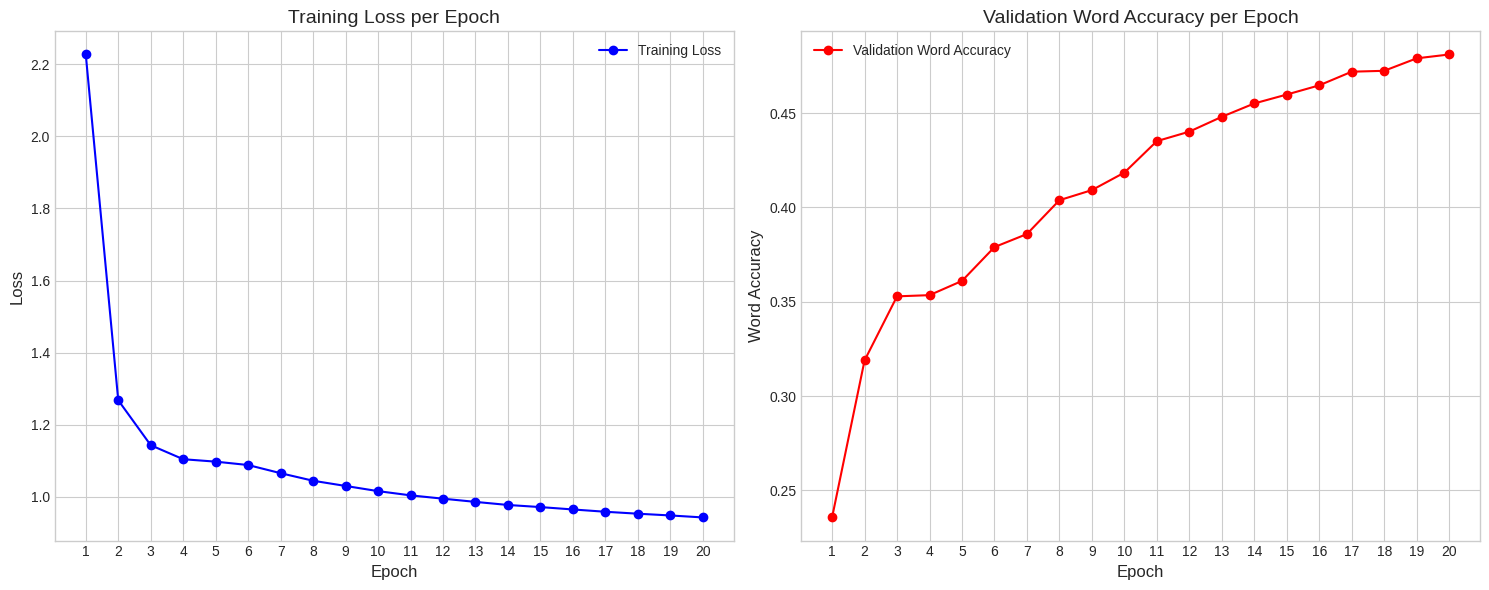

In [ ]:
import torch
import matplotlib.pyplot as plt # ADDED: Import matplotlib for plotting

# Assuming all your other functions (train_epoch, evaluate) and variables
# (model, train_loader, optimizer, etc.) are defined above this cell.

# Cell 13: training loop with plotting

best_valid_metric = -1.0
patience_counter = 0
max_patience = 5

# ADDED: Lists to store metrics for plotting
train_losses = []
valid_word_accs = []
epochs_ran = []

print("Starting training...\n")
for epoch in range(1, hp["num_epochs"] + 1):
    train_loss, current_lr = train_epoch(
        model, train_loader, optimizer, scheduler, criterion, hp, epoch
    )
    print(f"\nEpoch {epoch}/{hp['num_epochs']}")
    print(f"Train Loss: {train_loss:.4f} | LR: {current_lr:.6f}")

    word_acc, lev_sim, char_match, cer = evaluate(model, valid_loader, inv_tgt, hp)
    print(f"Valid -> Word Acc: {word_acc:.4f} | LevSim: {lev_sim:.4f} | "
          f"CharMatch: {char_match:.4f} | CER: {cer:.4f}")

    # ADDED: Append metrics to lists for this epoch
    train_losses.append(train_loss)
    valid_word_accs.append(word_acc)
    epochs_ran.append(epoch)

    valid_metric = word_acc + lev_sim
    if valid_metric > best_valid_metric:
        best_valid_metric = valid_metric
        patience_counter = 0
        torch.save({
            "model_state": model.state_dict(),
            "src_vocab": src_vocab,
            "tgt_vocab": tgt_vocab,
            "inv_tgt": inv_tgt,
            "hp": hp
        }, hp["save_path"])
        print(f"✓ Saved best model (metric={valid_metric:.4f})")
    else:
        patience_counter += 1
        print(f"No improvement ({patience_counter}/{max_patience})")

    if patience_counter >= max_patience:
        print(f"\nEarly stopping at epoch {epoch}")
        break

# ADDED: Plotting section after the training loop finishes
print("\nTraining finished. Plotting metrics...")

plt.style.use('seaborn-v0_8-whitegrid') # Optional: for a nice plot style
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Training Loss vs. Epochs
ax1.plot(epochs_ran, train_losses, 'b-o', label='Training Loss')
ax1.set_title('Training Loss per Epoch', fontsize=14)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xticks(epochs_ran) # Ensure integer epoch numbers on x-axis

# Plot 2: Validation Word Accuracy vs. Epochs
ax2.plot(epochs_ran, valid_word_accs, 'r-o', label='Validation Word Accuracy')
ax2.set_title('Validation Word Accuracy per Epoch', fontsize=14)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Word Accuracy', fontsize=12)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_xticks(epochs_ran) # Ensure integer epoch numbers on x-axis

plt.tight_layout()
plt.show()

In [ ]:
import csv
from sklearn.metrics import f1_score
from tqdm import tqdm

def evaluate(model, dataloader, inv_tgt, hp, save_failed_csv="failed_predictions.csv"):
    """Evaluate model on validation/test set and save failed predictions with mismatched chars and source word."""
    model.eval()
    device = hp["device"]

    n_samples = 0
    n_word_correct = 0
    total_lev = 0
    total_lev_sim = 0.0
    total_ref_chars = 0
    total_matching_chars = 0
    total_char_f1 = 0.0

    PAD, SOS, EOS = 0, 1, 2
    max_len = hp["max_target_len"]

    failed_records = []  # To store failed examples

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            src = batch["src"].to(device)
            tgt_raws = batch["tgt_raws"]
            src_texts = batch.get("src_raws", ["<encoded_input>"] * src.size(0))  # original input words
            batch_size = src.size(0)

            src_pad_mask = (src == 0)
            dec_input = torch.full((batch_size, 1), SOS, dtype=torch.long, device=device)

            for _ in range(max_len):
                tgt_pad_mask = (dec_input == 0)
                logits = model(src, dec_input,
                               src_key_padding_mask=src_pad_mask,
                               tgt_key_padding_mask=tgt_pad_mask)
                next_token = logits[:, -1, :].argmax(dim=-1, keepdim=True)
                dec_input = torch.cat([dec_input, next_token], dim=1)
                if (next_token == EOS).all():
                    break

            for i in range(batch_size):
                pred_ids = dec_input[i, 1:].cpu().numpy()
                if EOS in pred_ids:
                    pred_ids = pred_ids[:list(pred_ids).index(EOS)]

                pred_chars = []
                for pid in pred_ids:
                    ch = inv_tgt.get(pid, "")
                    if ch not in ("<pad>", "<sos>", "<eos>"):
                        pred_chars.append(ch if ch != "<unk>" else "")
                pred = "".join(pred_chars)
                ref = tgt_raws[i]
                src_word = src_texts[i]  # original source word

                n_samples += 1
                if pred == ref:
                    n_word_correct += 1

                d = levenshtein(pred, ref)
                total_lev += d
                maxlen = max(1, max(len(pred), len(ref)))
                total_lev_sim += 1.0 - (d / maxlen)

                match_chars = sum(1 for a, b in zip(pred, ref) if a == b)
                total_matching_chars += match_chars
                total_ref_chars += len(ref)

                # Character-level F1
                all_chars = list(set(pred + ref))
                char_to_idx = {c: idx for idx, c in enumerate(all_chars)}
                y_true = [0] * len(all_chars)
                y_pred = [0] * len(all_chars)
                for c in ref: y_true[char_to_idx[c]] = 1
                for c in pred: y_pred[char_to_idx[c]] = 1
                f1 = f1_score(y_true, y_pred, zero_division=0)
                total_char_f1 += f1

                # -------------------------------
                # Capture failed predictions
                # -------------------------------
                if pred != ref:
                    mismatches = [(r, p, idx) for idx, (r, p) in enumerate(zip(ref, pred)) if r != p]
                    if len(ref) > len(pred):
                        mismatches += [(r, "-", idx) for idx, r in enumerate(ref[len(pred):], start=len(pred))]
                    elif len(pred) > len(ref):
                        mismatches += [("-", p, idx) for idx, p in enumerate(pred[len(ref):], start=len(ref))]

                    failed_records.append({
                        "source": src_word,
                        "input": src_word,
                        "target": ref,
                        "predicted": pred,
                        "mismatches": mismatches
                    })

    # Save failed predictions to CSV
    with open(save_failed_csv, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Source", "Input", "Target", "Predicted", "Mismatches"])
        for rec in failed_records:
            mismatches_str = "; ".join([f"{r}->{p}@{idx}" for r, p, idx in rec["mismatches"]])
            writer.writerow([rec["source"], rec["input"], rec["target"], rec["predicted"], mismatches_str])

    # Compute final metrics
    word_acc = n_word_correct / max(1, n_samples)
    avg_lev_sim = total_lev_sim / max(1, n_samples)
    char_match_rate = total_matching_chars / max(1, total_ref_chars)
    cer = total_lev / max(1, total_ref_chars)
    char_f1 = total_char_f1 / max(1, n_samples)

    return word_acc, avg_lev_sim, char_match_rate, cer, char_f1


In [ ]:
#Cell 14: final evaluation + inference examples
print("\n" + "="*60)
print("FINAL EVALUATION ON TEST SET")
print("="*60)

ckpt = torch.load(hp["save_path"], map_location=device)
model.load_state_dict(ckpt["model_state"])

# Updated to capture char_f1
word_acc, lev_sim, char_match, cer, char_f1 = evaluate(model, test_loader, inv_tgt, hp)

print(f"\nTest Results:")
print(f"  Word Accuracy: {word_acc:.4f} ({word_acc*100:.2f}%)")
print(f"  Levenshtein Similarity: {lev_sim:.4f}")
print(f"  Character Match Rate: {char_match:.4f}")
print(f"  Character Error Rate (CER): {cer:.4f}")
print(f"  1 - CER: {1-cer:.4f}")
print(f"  Character-level F1: {char_f1:.4f}")  # new line

print("\n" + "="*60)
print("INFERENCE EXAMPLES (Beam Search)")
print("="*60)

examples = [
    "bengaluru",
    "khana", "khayenge", "abhi", "waqt","KIDHAR"
]

for word in examples:
    pred = infer_word(word, model, src_vocab, inv_tgt, hp)
    print(f"{word:15s} -> {pred}")

print("\n" + "="*60)
print("SENTENCE INFERENCE")
print("="*60)

sentences = [
    "namaste bharat",
    "delhi mumbai",
]

for sent in sentences:
    pred = infer_sentence(sent, model, src_vocab, inv_tgt, hp)
    print(f"{sent:20s} -> {pred}")

print("\n" + "="*60)
print("Training complete! Best model saved to:", hp["save_path"])
print("="*60)



FINAL EVALUATION ON TEST SET


Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:6041: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Evaluating:   1%|▏         | 1/79 [00:02<03:04,  2.37s/it]/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:6041: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Evaluating:   3%|▎         | 2/79 [00:04<02:55,  2.28s/it]/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:6041: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Evaluating:   4%|▍         | 3/79 [00:06<02:52,  2.27s/it]/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:6041: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both in


Test Results:
  Word Accuracy: 0.4658 (46.58%)
  Levenshtein Similarity: 0.8580
  Character Match Rate: 0.7569
  Character Error Rate (CER): 0.1423
  1 - CER: 0.8577
  Character-level F1: 0.8991

INFERENCE EXAMPLES (Beam Search)
bengaluru       -> बेंगलूरू
khana           -> खाना
khayenge        -> खायेंगे
abhi            -> अभी
waqt            -> वाक्ट
KIDHAR          -> किधार

SENTENCE INFERENCE
namaste bharat       -> नमस्ते भारत
delhi mumbai         -> देल्ही मुंबई

Training complete! Best model saved to: /content/best_transformer_model.pt


In [ ]:

# Print main metrics


# ----------------------------
# Display some failed Hindi examples
# ----------------------------
import csv

print("\nSOME FAILED HINDI PREDICTIONS:")
with open("failed_predictions.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    count = 0
    for row in reader:
        count += 1
        print(f"Source: {row['Source']}")
        print(f"Input   : {row['Input']}")
        print(f"Target  : {row['Target']}")
        print(f"Predicted: {row['Predicted']}")
        print(f"Mismatches: {row['Mismatches']}")
        print("-"*40)
        if count >= 10:  # show only first 10 failed examples
            break



SOME FAILED HINDI PREDICTIONS:


FileNotFoundError: [Errno 2] No such file or directory: 'failed_predictions.csv'

In [ ]:
from collections import defaultdict, Counter
import csv

# Dictionary: ref_char -> Counter of predicted chars
char_confusions = defaultdict(Counter)

with open("failed_predictions.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        mismatches = row["Mismatches"].split("; ")
        for m in mismatches:
            # Each mismatch is in the format ref->pred@idx
            if "->" in m and "@" in m:
                ref_pred, _ = m.split("@")
                ref, pred = ref_pred.split("->")
                ref = ref.strip()
                pred = pred.strip()
                char_confusions[ref][pred] += 1

# Sort reference characters by total confusion count
sorted_chars = sorted(char_confusions.items(), key=lambda x: sum(x[1].values()), reverse=True)

# Print top confusions
for ref_char, counter in sorted_chars:
    total_confusions = sum(counter.values())
    print(f"Character '{ref_char}' confused {total_confusions} times:")
    for pred_char, count in counter.most_common(5):  # top 5 predictions for this char
        print(f"   Predicted as '{pred_char}': {count} times")
    print("-" * 40)


Character '-' confused 2163 times:
   Predicted as 'ा': 281 times
   Predicted as 'ी': 239 times
   Predicted as 'ए': 158 times
   Predicted as 'र': 147 times
   Predicted as 'न': 134 times
----------------------------------------
Character 'ा' confused 2144 times:
   Predicted as '-': 339 times
   Predicted as 'र': 227 times
   Predicted as 'न': 176 times
   Predicted as 'ल': 132 times
   Predicted as 'त': 108 times
----------------------------------------
Character '्' confused 1174 times:
   Predicted as 'र': 148 times
   Predicted as 'स': 110 times
   Predicted as '-': 82 times
   Predicted as 'त': 72 times
   Predicted as 'ल': 65 times
----------------------------------------
Character 'र' confused 1004 times:
   Predicted as 'ा': 190 times
   Predicted as '-': 166 times
   Predicted as '्': 134 times
   Predicted as 'ी': 57 times
   Predicted as 'क': 38 times
----------------------------------------
Character 'ी' confused 860 times:
   Predicted as '-': 229 times
   Predicted as 

In [ ]:
# Compare greedy vs beam search decoding for Transformer
import math
import torch
import torch.nn.functional as F
from tqdm import tqdm
from collections import Counter

def char_level_f1(pred, ref):
    pred_counts = Counter(pred)
    ref_counts = Counter(ref)

    # True positives = sum of min counts for matching chars
    tp = sum(min(pred_counts[c], ref_counts[c]) for c in pred_counts if c in ref_counts)
    fp = sum(pred_counts[c] for c in pred_counts) - tp
    fn = sum(ref_counts[c] for c in ref_counts) - tp

    precision = tp / (tp + fp) if tp + fp > 0 else 0.0
    recall    = tp / (tp + fn) if tp + fn > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0.0
    return f1

# Single-sample greedy decoder for Transformer
def greedy_decode_transformer(model, src_tensor, inv_tgt, hp):
    """
    src_tensor: (1, src_len) tensor on device
    returns: predicted string (without special tokens)
    """
    device = hp["device"]
    PAD, SOS, EOS = 0, 1, 2
    max_len = hp["max_target_len"]

    model.eval()
    with torch.no_grad():
        src_pad_mask = (src_tensor == PAD)  # (1, src_len)
        dec_input = torch.full((1, 1), SOS, dtype=torch.long, device=device)  # start with SOS

        for _ in range(max_len):
            tgt_pad_mask = (dec_input == PAD)
            logits = model(src_tensor, dec_input,
                           src_key_padding_mask=src_pad_mask,
                           tgt_key_padding_mask=tgt_pad_mask)
            next_token = logits[:, -1, :].argmax(dim=-1, keepdim=True)  # (1,1)
            dec_input = torch.cat([dec_input, next_token], dim=1)
            # break early if EOS generated
            if (next_token == EOS).all():
                break

        # convert ids to string
        pred_ids = dec_input[0, 1:].cpu().numpy().tolist()  # skip SOS
        if EOS in pred_ids:
            pred_ids = pred_ids[:pred_ids.index(EOS)]

        pred_chars = []
        for pid in pred_ids:
            ch = inv_tgt.get(pid, "")
            if ch in ("<pad>", "<sos>", "<eos>"):
                continue
            if ch == "<unk>":
                # choose placeholder or empty string
                continue
            pred_chars.append(ch)
        return "".join(pred_chars)

# Single-sample beam-search decoder for Transformer
def beam_search_transformer(model, src_tensor, inv_tgt, hp):
    """
    Beam search for one sample.
    Returns predicted string (no special tokens)
    """
    device = hp["device"]
    PAD, SOS, EOS = 0, 1, 2
    beam_size = int(hp.get("beam_size", 5))
    alpha = float(hp.get("length_penalty", 0.6))
    max_len = hp["max_target_len"]

    model.eval()
    with torch.no_grad():
        src_pad_mask = (src_tensor == PAD)  # (1, src_len)

        # beams: list of tuples (score, seq_list)
        beams = [(0.0, [SOS])]
        completed = []

        for _ in range(max_len):
            candidates = []
            for score, seq in beams:
                if seq[-1] == EOS:
                    completed.append((score, seq))
                    continue

                dec_input = torch.tensor([seq], dtype=torch.long, device=device)
                tgt_pad_mask = (dec_input == PAD)
                logits = model(src_tensor, dec_input,
                               src_key_padding_mask=src_pad_mask,
                               tgt_key_padding_mask=tgt_pad_mask)
                # log probs for last position
                log_probs = F.log_softmax(logits[0, -1, :], dim=-1)  # (vocab,)
                topk_logp, topk_ids = log_probs.topk(beam_size)

                for lp, idx in zip(topk_logp.cpu().tolist(), topk_ids.cpu().tolist()):
                    new_score = score + float(lp)
                    new_seq = seq + [int(idx)]
                    candidates.append((new_score, new_seq))

            if not candidates:
                break

            # length-normalized ranking
            candidates.sort(key=lambda x: x[0] / (len(x[1]) ** alpha), reverse=True)
            beams = candidates[:beam_size]

            # stop early if all beams ended with EOS
            if all(b[1][-1] == EOS for b in beams):
                break

        all_hyps = completed + beams
        if not all_hyps:
            return ""

        # choose best by normalized score
        best_seq = max(all_hyps, key=lambda x: x[0] / (len(x[1]) ** alpha))[1]

        # convert to string (skip SOS, stop at EOS)
        pred_ids = []
        for pid in best_seq[1:]:
            if pid == EOS:
                break
            pred_ids.append(int(pid))

        pred_chars = []
        for pid in pred_ids:
            ch = inv_tgt.get(pid, "")
            if ch in ("<pad>", "<sos>", "<eos>"):
                continue
            if ch == "<unk>":
                continue
            pred_chars.append(ch)
        return "".join(pred_chars)

def compare_decoding(model, dataloader, inv_tgt, hp, n_samples=None, use_progress=True):
    """
    Runs greedy and beam search decoding on the dataloader.
    Computes word accuracy, Levenshtein similarity, character match rate,
    CER, and char-level F1.
    """
    device = hp["device"]
    PAD, SOS, EOS = 0, 1, 2

    # accumulators
    stats = {
        "greedy": {"n":0, "correct_words":0, "total_lev":0, "total_lev_sim":0.0,
                   "total_match_chars":0, "total_ref_chars":0, "total_char_f1":0.0},
        "beam":   {"n":0, "correct_words":0, "total_lev":0, "total_lev_sim":0.0,
                   "total_match_chars":0, "total_ref_chars":0, "total_char_f1":0.0},
    }

    it = dataloader
    if use_progress:
        it = tqdm(dataloader, desc="Comparing decoders", leave=False)

    seen = 0
    with torch.no_grad():
        for batch in it:
            src = batch["src"].to(device)         # (B, src_len)
            tgt_raws = batch["tgt_raws"]
            batch_size = src.size(0)

            for i in range(batch_size):
                src_i = src[i:i+1]  # (1, src_len)
                ref = tgt_raws[i]

                # ------------------ GREEDY ------------------
                pred_g = greedy_decode_transformer(model, src_i, inv_tgt, hp)
                stats["greedy"]["n"] += 1
                if pred_g == ref:
                    stats["greedy"]["correct_words"] += 1
                d_g = levenshtein(pred_g, ref)
                stats["greedy"]["total_lev"] += d_g
                maxlen_g = max(1, max(len(pred_g), len(ref)))
                stats["greedy"]["total_lev_sim"] += 1.0 - d_g / maxlen_g
                stats["greedy"]["total_match_chars"] += sum(1 for a,b in zip(pred_g, ref) if a==b)
                stats["greedy"]["total_ref_chars"] += len(ref)
                stats["greedy"]["total_char_f1"] += char_level_f1(pred_g, ref)

                # ------------------ BEAM ------------------
                pred_b = beam_search_transformer(model, src_i, inv_tgt, hp)
                stats["beam"]["n"] += 1
                if pred_b == ref:
                    stats["beam"]["correct_words"] += 1
                d_b = levenshtein(pred_b, ref)
                stats["beam"]["total_lev"] += d_b
                maxlen_b = max(1, max(len(pred_b), len(ref)))
                stats["beam"]["total_lev_sim"] += 1.0 - d_b / maxlen_b
                stats["beam"]["total_match_chars"] += sum(1 for a,b in zip(pred_b, ref) if a==b)
                stats["beam"]["total_ref_chars"] += len(ref)
                stats["beam"]["total_char_f1"] += char_level_f1(pred_b, ref)

                seen += 1
                if n_samples is not None and seen >= n_samples:
                    break
            if n_samples is not None and seen >= n_samples:
                break

    # compute aggregated metrics
    results = {}
    for key in ("greedy","beam"):
        s = stats[key]
        n = max(1, s["n"])
        word_acc = s["correct_words"] / n
        avg_lev_sim = s["total_lev_sim"] / n
        char_match_rate = s["total_match_chars"] / max(1, s["total_ref_chars"])
        cer = s["total_lev"] / max(1, s["total_ref_chars"])
        char_f1 = s["total_char_f1"] / n
        results[key] = {
            "word_acc": word_acc,
            "avg_lev_sim": avg_lev_sim,
            "char_match_rate": char_match_rate,
            "cer": cer,
            "char_f1": char_f1,
            "n": n
        }

    # print a concise comparison
    print("Decoding comparison:")
    for k in ("greedy","beam"):
        r = results[k]
        print(f"{k.upper():6s} | N={r['n']:4d} | WordAcc={r['word_acc']:.4f} | "
              f"LevSim={r['avg_lev_sim']:.4f} | CharMatch={r['char_match_rate']:.4f} | "
              f"CER={r['cer']:.4f} | CharF1={r['char_f1']:.4f}")

    return results


In [ ]:
import random

# test_loader has batch_size=128
all_batches = list(test_loader)       # convert DataLoader to list of batches
sampled_batches = random.sample(all_batches, 10)  # pick 10 random batches

# Run decoding comparison on these batches
results = compare_decoding(model, sampled_batches, inv_tgt, hp, n_samples=None)


Decoding comparison:
GREEDY | N=1280 | WordAcc=0.4570 | LevSim=0.8612 | CharMatch=0.7622 | CER=0.1421 | CharF1=0.8906
BEAM   | N=1280 | WordAcc=0.4633 | LevSim=0.8633 | CharMatch=0.7637 | CER=0.1294 | CharF1=0.8922


LSTM

In [ ]:
# imports & HP initialization
import os
import json
import math
import random
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# ---------------------------
# HYPERPARAMETERS (use your file paths)
# ---------------------------
HP = {
    "train_path": "/content/hin_train_100k_sample.json",
    "valid_path": "/content/hin_valid.json",
    "test_path":  "/content/hin_test.json",
    "batch_size": 256,
    "embed_size": 128,
    "hidden_size": 256,
    "num_layers": 2,           # MUST be <= 2
    "bidirectional_encoder": True,
    "dropout": 0.4,
    "learning_rate": 1e-3,
    "num_epochs": 16,
    "teacher_forcing_ratio": 0.5,
    "max_target_len": 64,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "save_path": "sampled_lstm_model.pt",
    "seed": 42,
    "num_workers": 2,
}

if HP["num_layers"] > 2:
    raise ValueError("num_layers must be <= 2 per your constraint.")

torch.manual_seed(HP["seed"])
np.random.seed(HP["seed"])
random.seed(HP["seed"])
print("Device:", HP["device"])



Device: cuda


In [ ]:
# Cell 2: utilities
from typing import List
def levenshtein(a: str, b: str) -> int:
    if a == b:
        return 0
    la, lb = len(a), len(b)
    if la == 0:
        return lb
    if lb == 0:
        return la
    prev = list(range(lb + 1))
    for i, ca in enumerate(a, start=1):
        cur = [i] + [0] * lb
        for j, cb in enumerate(b, start=1):
            add = prev[j] + 1
            delete = cur[j - 1] + 1
            replace = prev[j - 1] + (0 if ca == cb else 1)
            cur[j] = min(add, delete, replace)
        prev = cur
    return prev[lb]

def ensure_cols(df: pd.DataFrame, cols: List[str]):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"Missing required columns: {missing}")


In [ ]:
# Cell 3: dataset and collate
class TranslitDataset(Dataset):
    def __init__(self, df: pd.DataFrame, src_vocab: Dict[str,int],
                 tgt_vocab: Dict[str,int], max_tgt_len: int):
        self.srcs = df["english word"].astype(str).tolist()
        self.tgts = df["native word"].astype(str).tolist()
        self.src_vocab = src_vocab
        self.tgt_vocab = tgt_vocab
        self.max_tgt_len = max_tgt_len

    def __len__(self):
        return len(self.srcs)

    def encode_src(self, s: str) -> List[int]:
        return [self.src_vocab.get(ch, self.src_vocab["<unk>"])
                for ch in list(s.lower())]

    def encode_tgt(self, s: str) -> List[int]:
        chars = list(s.strip())[:self.max_tgt_len - 1]
        return [self.tgt_vocab.get(ch, self.tgt_vocab["<unk>"])
                for ch in chars]

    def __getitem__(self, idx):
        return {
            "src_raw": self.srcs[idx],
            "tgt_raw": self.tgts[idx],
            "src": torch.tensor(self.encode_src(self.srcs[idx]), dtype=torch.long),
            "tgt": torch.tensor(self.encode_tgt(self.tgts[idx]), dtype=torch.long),
        }

def collate_fn(batch):
    """Collate batch with padding."""
    PAD, SOS, EOS = 0, 1, 2

    srcs = [b["src"] for b in batch]
    tgts = [b["tgt"] for b in batch]
    src_lens = [len(s) for s in srcs]
    tgt_lens = [len(t) for t in tgts]

    max_src = max(src_lens)
    max_tgt = max(tgt_lens) + 1

    src_padded = torch.full((len(batch), max_src), PAD, dtype=torch.long)
    dec_in_padded = torch.full((len(batch), max_tgt), PAD, dtype=torch.long)
    dec_target_padded = torch.full((len(batch), max_tgt), PAD, dtype=torch.long)

    for i, (s, t) in enumerate(zip(srcs, tgts)):
        src_padded[i, :s.size(0)] = s
        dec_in_padded[i, 0] = SOS
        dec_in_padded[i, 1:1+t.size(0)] = t
        dec_target_padded[i, :t.size(0)] = t
        dec_target_padded[i, t.size(0)] = EOS

    return {
        "src": src_padded,
        "src_lens": torch.tensor(src_lens, dtype=torch.long),
        "dec_in": dec_in_padded,
        "dec_target": dec_target_padded,
        "src_raws": [b["src_raw"] for b in batch],
        "tgt_raws": [b["tgt_raw"] for b in batch],
    }


In [ ]:
# Cell 4: build_vocabs (from train+valid+test)
def build_vocabs(train_path, valid_path, test_path):
    paths = [train_path, valid_path, test_path]
    src_chars = set()
    tgt_chars = set()

    for p in paths:
        if not os.path.exists(p):
            continue
        try:
            df = pd.read_json(p, lines=True)
        except Exception:
            df = pd.read_json(p)
        ensure_cols(df, ["english word", "native word"])
        for s in df["english word"].astype(str).tolist():
            src_chars.update(list(s.lower()))
        for t in df["native word"].astype(str).tolist():
            tgt_chars.update(list(t))

    def make_vocab(chars):
        idx = 4
        vocab = {"<pad>":0, "<sos>":1, "<eos>":2, "<unk>":3}
        for ch in sorted(chars):
            if ch in vocab:
                continue
            vocab[ch] = idx
            idx += 1
        inv = {v:k for k,v in vocab.items()}
        return vocab, inv

    src_vocab, inv_src = make_vocab(src_chars)
    tgt_vocab, inv_tgt = make_vocab(tgt_chars)
    return src_vocab, inv_src, tgt_vocab, inv_tgt


In [ ]:
# Cell 5: Encoder & Decoder
class Encoder(nn.Module):
    def __init__(self, input_dim, embed_dim, hidden_dim, num_layers=1, dropout=0.1, bidirectional=True):
        super().__init__()
        self.embed = nn.Embedding(input_dim, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=embed_dim,
                            hidden_size=hidden_dim,
                            num_layers=num_layers,
                            dropout=dropout if num_layers>1 else 0.0,
                            bidirectional=bidirectional,
                            batch_first=True)

    def forward(self, src, src_lens):
        embedded = self.embed(src)
        packed = nn.utils.rnn.pack_padded_sequence(embedded, src_lens, batch_first=True, enforce_sorted=False)
        packed_out, (h_n, c_n) = self.lstm(packed)
        out, _ = nn.utils.rnn.pad_packed_sequence(packed_out, batch_first=True)
        return out, (h_n, c_n)

class Decoder(nn.Module):
    def __init__(self, output_dim, embed_dim, hidden_dim, num_layers=1, dropout=0.1):
        super().__init__()
        self.embed = nn.Embedding(output_dim, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=embed_dim,
                            hidden_size=hidden_dim,
                            num_layers=num_layers,
                            dropout=dropout if num_layers>1 else 0.0,
                            batch_first=True)
        self.out = nn.Linear(hidden_dim, output_dim)

    def forward(self, dec_in, hidden):
        embedded = self.embed(dec_in)
        outputs, hidden = self.lstm(embedded, hidden)
        logits = self.out(outputs)
        return logits, hidden


In [ ]:
#instantiate encoder, decoder, create projection layers once, optimizer, criterion
src_vocab, inv_src, tgt_vocab, inv_tgt=build_vocabs(HP['train_path'], HP['valid_path'], HP['test_path'])
input_dim = len(src_vocab)
output_dim = len(tgt_vocab)

enc = Encoder(input_dim=input_dim,
              embed_dim=HP["embed_size"],
              hidden_dim=HP["hidden_size"],
              num_layers=HP["num_layers"],
              dropout=HP["dropout"],
              bidirectional=HP["bidirectional_encoder"]).to(HP["device"])

# decide decoder hidden size: match encoder concat if bidir, else same
dec_hidden_size = HP["hidden_size"] * (2 if HP["bidirectional_encoder"] else 1)
dec = Decoder(output_dim=output_dim,
              embed_dim=HP["embed_size"],
              hidden_dim=dec_hidden_size,
              num_layers=HP["num_layers"],
              dropout=HP["dropout"]).to(HP["device"])

# PROJECTIONS: if encoder is bidir and encoder_hidden*2 != decoder_hidden, create trainable proj layers
proj_h = None
proj_c = None
if HP["bidirectional_encoder"] and (HP["hidden_size"] * 2 != dec_hidden_size):
    proj_h = nn.Linear(HP["hidden_size"] * 2, dec_hidden_size).to(HP["device"])
    proj_c = nn.Linear(HP["hidden_size"] * 2, dec_hidden_size).to(HP["device"])

# single optimizer covering encoder, decoder, and projection (if any)
params = list(enc.parameters()) + list(dec.parameters())
if proj_h is not None and proj_c is not None:
    params += list(proj_h.parameters()) + list(proj_c.parameters())

optimizer = torch.optim.Adam(params, lr=HP["learning_rate"])
criterion = nn.CrossEntropyLoss(ignore_index=0)


In [ ]:
# Cell 7:  prepare decoder initial hidden/cell
def prepare_decoder_init(h_n, c_n, hp, proj_h=None, proj_c=None):
    """
    h_n/c_n from encoder: shape (num_layers * num_dirs, batch, enc_hidden)
    Return h_0, c_0 for decoder: (num_layers, batch, dec_hidden)
    """
    if not hp["bidirectional_encoder"]:
        return h_n.contiguous(), c_n.contiguous()

    num_layers = hp["num_layers"]
    batch_size = h_n.size(1)
    enc_h = hp["hidden_size"]
    # reshape (num_layers, 2, batch, enc_h)
    h_v = h_n.view(num_layers, 2, batch_size, enc_h)
    c_v = c_n.view(num_layers, 2, batch_size, enc_h)
    h_cat = torch.cat([h_v[:,0,:,:], h_v[:,1,:,:]], dim=2)  # (num_layers, batch, enc_h*2)
    c_cat = torch.cat([c_v[:,0,:,:], c_v[:,1,:,:]], dim=2)

    if proj_h is not None and proj_c is not None:
        h_0 = proj_h(h_cat)
        c_0 = proj_c(c_cat)
    else:
        h_0 = h_cat
        c_0 = c_cat

    return h_0.contiguous(), c_0.contiguous()


In [ ]:
# Corrected train_epoch function (complete, ready to paste into your notebook)
def train_epoch(enc, dec, dataloader, optimizer, criterion, hp, proj_h=None, proj_c=None):
    """
    Single training epoch for encoder-decoder LSTM setup.
    Arguments:
      - enc, dec: Encoder and Decoder nn.Module
      - dataloader: training DataLoader yielding batches in your collate format
      - optimizer: single optimizer already constructed over enc/dec/(proj_h/proj_c)
      - criterion: loss function (nn.CrossEntropyLoss with ignore_index=PAD)
      - hp: hyperparameter dict (expects keys device, teacher_forcing_ratio)
      - proj_h, proj_c: optional projection nn.Linear layers (or None)
    Returns:
      - avg_loss: average loss per sample over the epoch
    """
    enc.train()
    dec.train()
    device = hp["device"]

    total_loss = 0.0
    total_samples = 0

    PAD, SOS, EOS = 0, 1, 2

    for batch in tqdm(dataloader, desc="train", leave=False):
        # Move tensors to device as needed; keep src_lens on CPU for pack_padded_sequence
        src = batch["src"].to(device)
        src_lens = batch["src_lens"]            # keep on CPU (int tensor), required by pack_padded_sequence
        dec_in = batch["dec_in"].to(device)
        dec_target = batch["dec_target"].to(device)

        optimizer.zero_grad()

        # ----- Encoder forward -----
        enc_out, (h_n, c_n) = enc(src, src_lens)

        # ----- Prepare decoder initial hidden/cell -----
        # This logic mirrors prepare_decoder_init but kept inline for clarity
        if not hp["bidirectional_encoder"]:
            h_0 = h_n.contiguous()
            c_0 = c_n.contiguous()
        else:
            num_layers = hp["num_layers"]
            batch_size = h_n.size(1)
            enc_h = hp["hidden_size"]  # encoder per-direction hidden size
            # reshape encoder hidden state (num_layers*2, batch, enc_h) -> (num_layers, 2, batch, enc_h)
            h_view = h_n.view(num_layers, 2, batch_size, enc_h)
            c_view = c_n.view(num_layers, 2, batch_size, enc_h)
            # concat forward/backward -> (num_layers, batch, enc_h*2)
            h_cat = torch.cat([h_view[:,0,:,:], h_view[:,1,:,:]], dim=2)
            c_cat = torch.cat([c_view[:,0,:,:], c_view[:,1,:,:]], dim=2)
            if (proj_h is not None) and (proj_c is not None):
                h_0 = proj_h(h_cat)  # learnable projection
                c_0 = proj_c(c_cat)
            else:
                h_0 = h_cat
                c_0 = c_cat

        # Teacher forcing or autoregressive path
        use_tf = (random.random() < hp.get("teacher_forcing_ratio", 0.5))

        if use_tf:
            # run decoder on full ground-truth input (fast)
            logits, _ = dec(dec_in, (h_0, c_0))               # logits: (batch, seq_len, vocab)
            loss = criterion(logits.view(-1, logits.size(-1)), dec_target.view(-1))
        else:
            # autoregressive greedy generation, collect logits to compute loss
            batch_size = src.size(0)
            seq_len = dec_in.size(1)
            hidden = (h_0, c_0)
            input_t = dec_in[:, 0].unsqueeze(1)  # SOS token (batch,1)
            collected_logits = []                # will hold (batch, vocab) per step

            for t in range(1, seq_len):
                out_t, hidden = dec(input_t, hidden)    # out_t: (batch, 1, vocab)
                logits_t = out_t.squeeze(1)             # (batch, vocab)
                collected_logits.append(logits_t)
                top1 = logits_t.argmax(dim=1)           # (batch,)
                input_t = top1.unsqueeze(1)             # feed predicted token next step

            if len(collected_logits) == 0:
                # degenerate: sequence length 1 (only SOS) -> zero/fake loss
                loss = torch.tensor(0.0, device=device, requires_grad=True)
            else:
                logits_cat = torch.stack(collected_logits, dim=1)  # (batch, seq-1, vocab)
                # Align with dec_target[:, :seq_len-1]
                loss = criterion(logits_cat.view(-1, logits_cat.size(-1)),
                                 dec_target[:, :seq_len-1].contiguous().view(-1))

        # ----- Backprop, clip, step -----
        loss.backward()

        # collect parameter list used by optimizer (consistent with how optimizer was created)
        # NOTE: optimizer.param_groups hold the params; but we explicitly build the list for clipping
        param_list = list(enc.parameters()) + list(dec.parameters())
        if proj_h is not None and proj_c is not None:
            param_list += list(proj_h.parameters()) + list(proj_c.parameters())

        # correct usage: positional argument, not params=...
        torch.nn.utils.clip_grad_norm_(param_list, max_norm=1.0)

        optimizer.step()

        # accumulate
        total_loss += float(loss.item()) * src.size(0)
        total_samples += src.size(0)

    avg_loss = total_loss / max(1, total_samples)
    return avg_loss


In [ ]:
from sklearn.metrics import f1_score

def evaluate(enc, dec, dataloader, hp, inv_tgt, proj_h=None, proj_c=None):
    enc.eval()
    dec.eval()
    device = hp["device"]

    n_samples = 0
    n_word_correct = 0
    total_lev_sim = 0.0
    total_matching_chars = 0
    total_ref_chars = 0
    total_char_f1 = 0.0  # NEW

    PAD, SOS, EOS = 0, 1, 2
    max_out_len = hp["max_target_len"]

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="eval", leave=False):
            src = batch["src"].to(device)
            src_lens = batch["src_lens"]   # CPU
            tgt_raws = batch["tgt_raws"]
            batch_size = src.size(0)

            enc_out, (h_n, c_n) = enc(src, src_lens)
            h_0, c_0 = prepare_decoder_init(h_n, c_n, hp, proj_h=proj_h, proj_c=proj_c)
            hidden = (h_0, c_0)

            input_t = torch.full((batch_size, 1), SOS, dtype=torch.long, device=device)
            decoded_ids = [[] for _ in range(batch_size)]
            finished = torch.zeros(batch_size, dtype=torch.bool, device=device)

            for _ in range(max_out_len):
                out, hidden = dec(input_t, hidden)  # (batch,1,vocab)
                logits = out.squeeze(1)
                top1 = logits.argmax(dim=1)
                input_t = top1.unsqueeze(1)
                for i, tok in enumerate(top1.cpu().numpy().tolist()):
                    if not finished[i]:
                        decoded_ids[i].append(int(tok))
                        if int(tok) == EOS:
                            finished[i] = True
                if finished.all():
                    break

            for i in range(batch_size):
                pred_ids = decoded_ids[i]
                if EOS in pred_ids:
                    pred_ids = pred_ids[:pred_ids.index(EOS)]
                pred_chars = []
                for pid in pred_ids:
                    ch = inv_tgt.get(pid, "")
                    if ch in ("<pad>", "<sos>", "<eos>"):
                        continue
                    if ch == "<unk>":
                        pred_chars.append("�")
                    else:
                        pred_chars.append(ch)
                pred = "".join(pred_chars)
                ref = tgt_raws[i]

                n_samples += 1
                if pred == ref:
                    n_word_correct += 1

                d = levenshtein(pred, ref)
                maxlen = max(1, max(len(pred), len(ref)))
                total_lev_sim += (1.0 - (d / maxlen))

                match_chars = sum(1 for a, b in zip(pred, ref) if a == b)
                total_matching_chars += match_chars
                total_ref_chars += len(ref)

                # -------------------------
                # Character-level F1
                # -------------------------
                all_chars = list(set(pred + ref))  # unique chars
                char_to_idx = {c: idx for idx, c in enumerate(all_chars)}
                y_true = [0] * len(all_chars)
                y_pred = [0] * len(all_chars)
                for c in ref: y_true[char_to_idx[c]] = 1
                for c in pred: y_pred[char_to_idx[c]] = 1
                f1 = f1_score(y_true, y_pred, zero_division=0)
                total_char_f1 += f1

    word_acc = n_word_correct / max(1, n_samples)
    avg_lev_sim = total_lev_sim / max(1, n_samples)
    char_match_rate = total_matching_chars / max(1, total_ref_chars) if total_ref_chars > 0 else 0.0
    char_f1 = total_char_f1 / max(1, n_samples)  # mean char F1 across all words

    return word_acc, avg_lev_sim, char_match_rate, char_f1


In [ ]:
# Cell 10: inference helpers
def infer_word(word: str, enc, dec, src_vocab, inv_tgt, hp, proj_h=None, proj_c=None, use_beam=False):
    ids = [src_vocab.get(ch, src_vocab["<unk>"]) for ch in list(word.lower())]
    device = hp["device"]
    src_tensor = torch.tensor([ids], dtype=torch.long, device=device)
    src_lens = torch.tensor([len(ids)], dtype=torch.long)

    with torch.no_grad():
        enc_out, (h_n, c_n) = enc(src_tensor, src_lens)
        h_0, c_0 = prepare_decoder_init(h_n, c_n, hp, proj_h=proj_h, proj_c=proj_c)
        hidden = (h_0, c_0)
        SOS, EOS = 1, 2
        input_t = torch.tensor([[SOS]], dtype=torch.long, device=device)
        pred_chars = []
        for _ in range(hp["max_target_len"]):
            out, hidden = dec(input_t, hidden)
            logits = out.squeeze(1)
            top1 = logits.argmax(dim=1).item()
            if top1 == EOS:
                break
            ch = inv_tgt.get(top1, "")
            if ch in ("<pad>", "<sos>", "<eos>"):
                continue
            if ch == "<unk>":
                pred_chars.append("�")
            else:
                pred_chars.append(ch)
            input_t = torch.tensor([[top1]], dtype=torch.long, device=device)
        return "".join(pred_chars)

def infer_sentence(sentence: str, enc, dec, src_vocab, inv_tgt, hp, proj_h=None, proj_c=None, use_beam=False):
    tokens = sentence.strip().split()
    return " ".join(infer_word(tok, enc, dec, src_vocab, inv_tgt, hp, proj_h=proj_h, proj_c=proj_c, use_beam=use_beam) for tok in tokens)


In [ ]:
# Cell 11: main train/eval loop with accuracy plotting
import matplotlib.pyplot as plt

if __name__ == "__main__":
    hp = HP
    device = torch.device(hp["device"])
    print("Device:", device)

    def read_maybe_jsonl(p):
        if not os.path.exists(p):
            raise FileNotFoundError(f"{p} not found")
        try:
            return pd.read_json(p, lines=True)
        except Exception:
            return pd.read_json(p)

    print("Loading the datasets...")
    df_train = read_maybe_jsonl(hp["train_path"])
    df_valid = read_maybe_jsonl(hp["valid_path"])
    df_test  = read_maybe_jsonl(hp["test_path"])
    for df in (df_train, df_valid, df_test):
        ensure_cols(df, ["english word", "native word"])
    print(f"Train: {len(df_train):,} | Valid: {len(df_valid):,} | Test: {len(df_test):,}")

    print("Building vocab...")
    src_vocab, inv_src, tgt_vocab, inv_tgt = build_vocabs(hp["train_path"], hp["valid_path"], hp["test_path"])
    print(f"Source vocab: {len(src_vocab):,} | Target vocab: {len(tgt_vocab):,}")

    # Prepare dataloaders
    train_ds = TranslitDataset(df_train, src_vocab, tgt_vocab, max_tgt_len=hp["max_target_len"])
    valid_ds = TranslitDataset(df_valid, src_vocab, tgt_vocab, max_tgt_len=hp["max_target_len"])
    test_ds  = TranslitDataset(df_test,  src_vocab, tgt_vocab, max_tgt_len=hp["max_target_len"])

    num_workers = max(0, min(hp["num_workers"], os.cpu_count() or 0))
    train_loader = DataLoader(train_ds, batch_size=hp["batch_size"], shuffle=True, collate_fn=collate_fn, num_workers=num_workers)
    valid_loader = DataLoader(valid_ds, batch_size=hp["batch_size"], shuffle=False, collate_fn=collate_fn, num_workers=num_workers)
    test_loader  = DataLoader(test_ds, batch_size=hp["batch_size"], shuffle=False, collate_fn=collate_fn, num_workers=num_workers)

    # instantiate models (re-create enc/dec/proj as in prior cell)
    input_dim = len(src_vocab)
    output_dim = len(tgt_vocab)

    enc = Encoder(input_dim=input_dim,
                  embed_dim=hp["embed_size"],
                  hidden_dim=hp["hidden_size"],
                  num_layers=hp["num_layers"],
                  dropout=hp["dropout"],
                  bidirectional=hp["bidirectional_encoder"]).to(device)

    dec_hidden_size = hp["hidden_size"] * (2 if hp["bidirectional_encoder"] else 1)
    dec = Decoder(output_dim=output_dim,
                  embed_dim=hp["embed_size"],
                  hidden_dim=dec_hidden_size,
                  num_layers=hp["num_layers"],
                  dropout=hp["dropout"]).to(device)

    proj_h = None
    proj_c = None
    if hp["bidirectional_encoder"] and (hp["hidden_size"] * 2 != dec_hidden_size):
        proj_h = nn.Linear(hp["hidden_size"] * 2, dec_hidden_size).to(device)
        proj_c = nn.Linear(hp["hidden_size"] * 2, dec_hidden_size).to(device)

    params = list(enc.parameters()) + list(dec.parameters())
    if proj_h is not None:
        params += list(proj_h.parameters()) + list(proj_c.parameters())
    optimizer = torch.optim.Adam(params, lr=hp["learning_rate"])
    criterion = nn.CrossEntropyLoss(ignore_index=0)

    # Lists to track metrics for plotting
    train_losses = []
    valid_accs = []
    valid_lev_sims = []
    epochs_list = []

    # training loop
    best_valid_metric = -1.0
    for epoch in range(1, hp["num_epochs"] + 1):
        print(f"\n===== Epoch {epoch}/{hp['num_epochs']} =====")
        train_loss = train_epoch(enc, dec, train_loader, optimizer, criterion, hp, proj_h=proj_h, proj_c=proj_c)
        print(f"Train loss: {train_loss:.4f}")



        print("Valid evaluation...")
        valid_word_acc, valid_avg_lev_sim, valid_char_match_rate = evaluate(enc, dec, valid_loader, hp, inv_tgt, proj_h=proj_h, proj_c=proj_c)
        print(f"Valid Word Accuracy: {valid_word_acc:.4f}  |  Valid Avg LevSim: {valid_avg_lev_sim:.4f}  |  CharMatchRate: {valid_char_match_rate:.4f}")

        # Store metrics
        epochs_list.append(epoch)
        train_losses.append(train_loss)
        valid_accs.append(valid_word_acc)
        valid_lev_sims.append(valid_avg_lev_sim)

        valid_metric = valid_word_acc + valid_avg_lev_sim
        if valid_metric > best_valid_metric:
            best_valid_metric = valid_metric
            # Save everything: model states + vocabs + hp + proj layers
            torch.save({
                "enc_state": enc.state_dict(),
                "dec_state": dec.state_dict(),
                "proj_h_state": proj_h.state_dict() if proj_h is not None else None,
                "proj_c_state": proj_c.state_dict() if proj_c is not None else None,
                "src_vocab": src_vocab,
                "tgt_vocab": tgt_vocab,
                "inv_tgt": inv_tgt,
                "hp": hp
            }, hp["save_path"])
            print(f"Saved best model to {hp['save_path']} (metric={valid_metric:.4f})")

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    # Plot 1: Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.plot(epochs_list, train_accs, 'b-o', label='Training Accuracy', linewidth=2)
    plt.plot(epochs_list, valid_accs, 'r-s', label='Validation Accuracy', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Word Accuracy', fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Plot 2: Training loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_list, train_losses, 'g-^', label='Training Loss', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_metrics.png', dpi=300, bbox_inches='tight')
    print("\nPlot saved as 'training_metrics.png'")
    plt.show()

    # Final evaluation
    print("\n=== Loading best model and evaluating on test set ===")
    ckpt = torch.load(hp["save_path"], map_location=device)
    enc.load_state_dict(ckpt["enc_state"])
    dec.load_state_dict(ckpt["dec_state"])
    if ckpt.get("proj_h_state") is not None and proj_h is not None:
        proj_h.load_state_dict(ckpt["proj_h_state"])
        proj_c.load_state_dict(ckpt["proj_c_state"])

    print("Running evaluation on test set ...")
    word_acc, avg_lev_sim, char_match_rate = evaluate(enc, dec, test_loader, hp, inv_tgt, proj_h=proj_h, proj_c=proj_c)
    print(f"Test Word Acc: {word_acc:.4f}")
    print(f"Test Avg Levenshtein Similarity: {avg_lev_sim:.4f}")
    print(f"Test Char Match Rate (position-wise): {char_match_rate:.4f}")

    # quick inference examples
    print("\nInference examples:")
    for w in ["namaste", "khana", "khayenge", "abhi", "waqt"]:
        print(w, " -> ", infer_word(w, enc, dec, src_vocab, inv_tgt, hp, proj_h=proj_h, proj_c=proj_c))
    print("Done.")

Device: cuda
Loading the datasets...
Train: 100,000 | Valid: 6,357 | Test: 10,112
Building vocab...
Source vocab: 30 | Target vocab: 69

===== Epoch 1/16 =====


KeyboardInterrupt: 

In [ ]:
import csv
from sklearn.metrics import f1_score
from tqdm import tqdm
import torch
import torch.nn.functional as F

def evaluate_lstm(enc, dec, dataloader, hp, inv_tgt, save_failed_csv="failed_predictions_lstm.csv",
                  proj_h=None, proj_c=None, device=None):
    """
    Evaluate BiLSTM model, compute metrics and save failed predictions with mismatches.
    """
    enc.eval()
    dec.eval()
    device = device or torch.device(hp.get("device", "cpu"))
    max_len = hp.get("max_target_len", 30)

    n_samples = 0
    n_word_correct = 0
    total_lev_sim = 0.0
    total_matching_chars = 0
    total_ref_chars = 0
    total_char_f1 = 0.0

    PAD, SOS, EOS = 0, 1, 2
    failed_records = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating LSTM", leave=False):
            src = batch["src"].to(device)
            src_lens = batch.get("src_lens", torch.tensor([src.size(1)]*src.size(0)))  # ensure available
            tgt_raws = batch["tgt_raws"]
            # Corrected key from src_texts to src_raws
            src_raws = batch.get("src_raws", ["<encoded_input>"] * src.size(0))
            batch_size = src.size(0)

            # Encode
            enc_out, (h_n, c_n) = enc(src, src_lens)
            h_0, c_0 = prepare_decoder_init(h_n, c_n, hp, proj_h=proj_h, proj_c=proj_c)
            hidden = (h_0, c_0)

            # Start decoding
            input_t = torch.full((batch_size, 1), SOS, dtype=torch.long, device=device)
            decoded_ids = [[] for _ in range(batch_size)]
            finished = torch.zeros(batch_size, dtype=torch.bool, device=device)

            for _ in range(max_len):
                out, hidden_new = dec(input_t, hidden)  # (batch, 1, vocab)
                logits = out.squeeze(1)
                top1 = logits.argmax(dim=1)
                input_t = top1.unsqueeze(1)
                for i, tok in enumerate(top1.cpu().numpy().tolist()):
                    if not finished[i]:
                        decoded_ids[i].append(int(tok))
                        if int(tok) == EOS:
                            finished[i] = True
                if finished.all():
                    break

            # Compute metrics and capture failed predictions
            for i in range(batch_size):
                pred_ids = decoded_ids[i]
                if EOS in pred_ids:
                    pred_ids = pred_ids[:pred_ids.index(EOS)]

                pred_chars = []
                for pid in pred_ids:
                    ch = inv_tgt.get(pid, "")
                    if ch in ("<pad>", "<sos>", "<eos>"):
                        continue
                    pred_chars.append(ch if ch != "<unk>" else "�")
                pred = "".join(pred_chars)
                ref = tgt_raws[i]
                src_word = src_raws[i] # Use the corrected variable name

                n_samples += 1
                if pred == ref:
                    n_word_correct += 1

                # Levenshtein similarity
                d = levenshtein(pred, ref)
                maxlen = max(1, max(len(pred), len(ref)))
                total_lev_sim += 1.0 - (d / maxlen)

                # Char match and F1
                match_chars = sum(1 for a, b in zip(pred, ref) if a == b)
                total_matching_chars += match_chars
                total_ref_chars += len(ref)

                all_chars = list(set(pred + ref))
                char_to_idx = {c: idx for idx, c in enumerate(all_chars)}
                y_true = [0]*len(all_chars)
                y_pred = [0]*len(all_chars)
                for c in ref: y_true[char_to_idx[c]] = 1
                for c in pred: y_pred[char_to_idx[c]] = 1
                total_char_f1 += f1_score(y_true, y_pred, zero_division=0)

                # Failed predictions
                if pred != ref:
                    mismatches = [(r, p, idx) for idx, (r, p) in enumerate(zip(ref, pred)) if r != p]
                    if len(ref) > len(pred):
                        mismatches += [(r, "-", idx) for idx, r in enumerate(ref[len(pred):], start=len(pred))]
                    elif len(pred) > len(ref):
                        mismatches += [("-", p, idx) for idx, p in enumerate(pred[len(ref):], start=len(ref))]
                    failed_records.append({
                        "source": src_word,
                        "input": src_word,
                        "target": ref,
                        "predicted": pred,
                        "mismatches": mismatches
                    })

    # Save failed predictions to CSV
    with open(save_failed_csv, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Source", "Input", "Target", "Predicted", "Mismatches"])
        for rec in failed_records:
            mismatches_str = "; ".join([f"{r}->{p}@{idx}" for r, p, idx in rec["mismatches"]])
            writer.writerow([rec["source"], rec["input"], rec["target"], rec["predicted"], mismatches_str])

    # Final metrics
    word_acc = n_word_correct / max(1, n_samples)
    avg_lev_sim = total_lev_sim / max(1, n_samples)
    char_match_rate = total_matching_chars / max(1, total_ref_chars) if total_ref_chars > 0 else 0.0
    char_f1 = total_char_f1 / max(1, n_samples)

    return word_acc, avg_lev_sim, char_match_rate, char_f1

In [ ]:
hp["device"] = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(hp["device"])


In [ ]:
  # Final evaluation
  hp = HP
  hp["device"] = "cuda" if torch.cuda.is_available() else "cpu"

  print("\n=== Loading best model and evaluating on test set ===")
  ckpt = torch.load(hp["save_path"], map_location=device)
  enc.load_state_dict(ckpt["enc_state"])
  dec.load_state_dict(ckpt["dec_state"])
  if ckpt.get("proj_h_state") is not None and proj_h is not None:
      proj_h.load_state_dict(ckpt["proj_h_state"])
      proj_c.load_state_dict(ckpt["proj_c_state"])

  print("Running evaluation on test set ...")
  # Corrected unpacking
  word_acc, avg_lev_sim, char_match_rate, char_f1 = evaluate_lstm(enc, dec, test_loader, hp, inv_tgt, proj_h=proj_h, proj_c=proj_c)
  print(f"Test Word Acc: {word_acc:.4f}")
  print(f"Test Avg Levenshtein Similarity: {avg_lev_sim:.4f}")
  print(f"Test Char Match Rate (position-wise): {char_match_rate:.4f}")
  print(f"Test Char-level F1: {char_f1:.4f}")


  # quick inference examples
  print("\nInference examples:")
  for w in ["namaste", "khana", "khayenge", "abhi", "waqt"]:
      print(w, " -> ", infer_word(w, enc, dec, src_vocab, inv_tgt, hp, proj_h=proj_h, proj_c=proj_c))
  print("Done.")


=== Loading best model and evaluating on test set ===
Running evaluation on test set ...


Test Word Acc: 0.4145
Test Avg Levenshtein Similarity: 0.8445
Test Char Match Rate (position-wise): 0.7399
Test Char-level F1: 0.8935

Inference examples:
namaste  ->  नमस्ते
khana  ->  खना
khayenge  ->  खाएंगे
abhi  ->  अभी
waqt  ->  वक््त
Done.


In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
from collections import Counter
from torch.utils.data import DataLoader, Subset
import random
import numpy as np

# -----------------------------
# Special tokens
# -----------------------------
PAD, SOS, EOS = 0, 1, 2

# -----------------------------
# Greedy decoding for LSTM
# -----------------------------
def greedy_decode_lstm(enc, dec, src_tensor, inv_tgt, hp, proj_h=None, proj_c=None):
    """Greedy decoding using separate BiLSTM encoder and decoder."""
    device = hp["device"]
    enc.eval()
    dec.eval()

    with torch.no_grad():
        # Ensure src_tensor is 2D (batch_size, seq_len)
        if src_tensor.dim() == 1: # Handle single word input
            src_tensor = src_tensor.unsqueeze(0)
        elif src_tensor.dim() == 3 and src_tensor.size(1) == 1:
             src_tensor = src_tensor.squeeze(1)


        src_len = torch.tensor([src_tensor.size(1)], dtype=torch.int64).cpu() # src_lens needs to be on CPU
        enc_out, (h_n, c_n) = enc(src_tensor, src_len)
        h_0, c_0 = prepare_decoder_init(h_n, c_n, hp, proj_h=proj_h, proj_c=proj_c)

        hidden = (h_0, c_0)
        dec_input = torch.full((src_tensor.size(0), 1), SOS, dtype=torch.long, device=device) # Start with SOS

        decoded_ids = [[] for _ in range(src_tensor.size(0))]
        finished = torch.zeros(src_tensor.size(0), dtype=torch.bool, device=device)

        max_len = hp["max_target_len"]
        for _ in range(max_len):
            out, hidden_new = dec(dec_input, hidden) # dec_input shape: (batch_size, 1)
            # Explicitly clone hidden states for the next step
            hidden = (hidden_new[0].clone(), hidden_new[1].clone())

            next_token = out.argmax(dim=-1) # Shape: (batch_size, 1)
            # Ensure next_token is (batch_size, 1) for the next decoder input
            dec_input = next_token # Already (batch_size, 1) from squeeze(1)

            for i in range(src_tensor.size(0)):
                if not finished[i]:
                    decoded_ids[i].append(int(next_token[i].item()))
                    if int(next_token[i].item()) == EOS:
                        finished[i] = True
            if finished.all():
                break

        pred_chars_list = []
        for i in range(src_tensor.size(0)):
            pred_ids = decoded_ids[i]
            if EOS in pred_ids:
                pred_ids = pred_ids[:pred_ids.index(EOS)]
            pred_chars = [inv_tgt.get(pid,"") for pid in pred_ids if inv_tgt.get(pid,"") not in ("<pad>","<sos>","<eos>","<unk>")]
            pred_chars_list.append("".join(pred_chars))

        # Return a list of strings if batch size > 1, else return a single string
        return pred_chars_list if src_tensor.size(0) > 1 else pred_chars_list[0]


def beam_search_lstm(enc, dec, src_tensor, inv_tgt, hp, proj_h=None, proj_c=None):
    """Beam search decoding using separate BiLSTM encoder and decoder."""
    device = hp["device"]
    beam_size = int(hp.get("beam_size",5))
    alpha = float(hp.get("length_penalty",0.6))
    enc.eval()
    dec.eval()

    with torch.no_grad():
        # Ensure src_tensor is 2D (batch_size, seq_len)
        if src_tensor.dim() == 1: # Handle single word input
            src_tensor = src_tensor.unsqueeze(0)
        elif src_tensor.dim() == 3 and src_tensor.size(1) == 1:
             src_tensor = src_tensor.squeeze(1)

        batch_size = src_tensor.size(0)
        if batch_size > 1:
            # Beam search is typically done per sample
            # For simplicity, process only the first sample in the batch
            print("Warning: Beam search currently only supports batch_size 1. Processing the first sample.")
            src_tensor = src_tensor[:1]
            batch_size = 1


        src_len = torch.tensor([src_tensor.size(1)], dtype=torch.int64).cpu()
        enc_out, (h_n, c_n) = enc(src_tensor, src_len)
        h_0, c_0 = prepare_decoder_init(h_n, c_n, hp, proj_h=proj_h, proj_c=proj_c)


        beams = [(0.0, [SOS], (h_0, c_0))]
        completed = []
        max_len = hp["max_target_len"]

        for _ in range(max_len):
            candidates = []
            for score, seq, hidden in beams:
                if seq[-1] == EOS:
                    completed.append((score, seq))
                    continue

                dec_input = torch.tensor([[seq[-1]]], device=device) # dec_input shape: (1, 1)
                out, hidden_new = dec(dec_input, hidden)
                log_probs = F.log_softmax(out.squeeze(1), dim=-1) # Shape: (1, vocab)
                topk_logp, topk_ids = log_probs[0].topk(beam_size) # Shape: (beam_size,)

                for lp, idx in zip(topk_logp.cpu().tolist(), topk_ids.cpu().tolist()):
                    new_seq = seq + [int(idx)]
                    new_score = score + lp
                    candidates.append((new_score, new_seq, (hidden_new[0], hidden_new[1]))) # Pass hidden states

            if not candidates:
                break
            candidates.sort(key=lambda x: x[0]/(len(x[1])**alpha), reverse=True)
            beams = candidates[:beam_size]
            if all(b[1][-1]==EOS for b in beams):
                break

        all_hyps = completed + [b for b in beams if b[1][-1] != EOS] # Add remaining beams
        if not all_hyps:
            return ""
        best_seq = max(all_hyps, key=lambda x: x[0]/(len(x[1])**alpha))[1]

        pred_chars = [inv_tgt.get(pid,"") for pid in best_seq[1:] if inv_tgt.get(pid,"") not in ("<pad>","<sos>","<eos>","<unk>")]
        return "".join(pred_chars)


# -----------------------------
# Character-level F1
# -----------------------------
def char_level_f1(pred, ref):
    pred_counts = Counter(pred)
    ref_counts = Counter(ref)
    tp = sum(min(pred_counts[c], ref_counts[c]) for c in pred_counts if c in ref_counts)
    fp = sum(pred_counts[c] for c in pred_counts) - tp
    fn = sum(ref_counts[c] for c in ref_counts) - tp
    precision = tp / (tp + fp) if tp + fp > 0 else 0.0
    recall    = tp / (tp + fn) if tp + fn > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0.0
    return f1

# -----------------------------
# Compare decoding for enc + dec
# -----------------------------
def compare_lstm_decoding_with_metrics(enc, dec, dataloader, inv_tgt, hp, n_samples=10, proj_h=None, proj_c=None):
    stats = {"greedy":[], "beam":[]}
    metrics = {"greedy":[], "beam":[]}
    seen = 0

    for batch in tqdm(dataloader, desc="Greedy vs Beam", leave=False):
        src = batch["src"].to(hp["device"])
        # Correct key
        tgt_raws = batch["tgt_raws"]
        batch_size = src.size(0)

        # Iterate through each sample in the batch for decoding comparison
        for i in range(batch_size):
            if n_samples is not None and seen >= n_samples:
                break

            # Correct selection: select a single sample without retaining batch dim
            src_i = src[i].unsqueeze(0) # Shape (1, seq_len)
            ref = tgt_raws[i]

            pred_g = greedy_decode_lstm(enc, dec, src_i, inv_tgt, hp, proj_h=proj_h, proj_c=proj_c)
            # Pass src_i to beam_search_lstm
            pred_b = beam_search_lstm(enc, dec, src_i, inv_tgt, hp, proj_h=proj_h, proj_c=proj_c)


            stats["greedy"].append((ref, pred_g))
            stats["beam"].append((ref, pred_b))

            for key, pred in zip(["greedy","beam"], [pred_g, pred_b]):
                word_acc = int(pred == ref)
                lev_sim = 1.0 - (levenshtein(pred, ref) / max(1, max(len(pred), len(ref))))
                char_match = sum(1 for a,b in zip(pred, ref) if a==b) / max(1,len(ref))
                cer = levenshtein(pred, ref) / max(1,len(ref))
                char_f1 = char_level_f1(pred, ref)
                metrics[key].append({
                    "word_acc": word_acc,
                    "lev_sim": lev_sim,
                    "char_match": char_match,
                    "cer": cer,
                    "char_f1": char_f1
                })

            seen += 1
        if n_samples is not None and seen >= n_samples:
            break


    # Print results per sample
    for i in range(len(stats["greedy"])):
        ref, g = stats["greedy"][i]
        _, b = stats["beam"][i]
        print(f"Sample {i+1}:")
        print(f"  REF   : {ref}")
        print(f"  GREEDY: {g} | metrics: WordAcc={metrics['greedy'][i]['word_acc']:.4f}, LevSim={metrics['greedy'][i]['lev_sim']:.4f}, CharMatch={metrics['greedy'][i]['char_match']:.4f}, CER={metrics['greedy'][i]['cer']:.4f}, CharF1={metrics['greedy'][i]['char_f1']:.4f}")
        print(f"  BEAM  : {b} | metrics: WordAcc={metrics['beam'][i]['word_acc']:.4f}, LevSim={metrics['beam'][i]['lev_sim']:.4f}, CharMatch={metrics['beam'][i]['char_match']:.4f}, CER={metrics['beam'][i]['cer']:.4f}, CharF1={metrics['beam'][i]['char_f1']:.4f}")
        print("-"*50)


    return stats, metrics

# -----------------------------
# Example: Run on random batches from test_loader
# -----------------------------
import random

# test_loader has batch_size=128
all_batches = list(test_loader)
# Get a fixed number of samples, not batches, for a clearer comparison
num_samples_to_compare = 1250

# Create a new DataLoader with batch_size=1 for comparison
# This simplifies the logic inside the comparison function
compare_loader = DataLoader(test_ds, batch_size=1, shuffle=False, collate_fn=collate_fn, num_workers=0) # Use 0 workers for simplicity with small sample size


stats, metrics = compare_lstm_decoding_with_metrics(
    enc, dec, compare_loader, inv_tgt, HP, n_samples=num_samples_to_compare, proj_h=proj_h, proj_c=proj_c
)

Sample 1:
  REF   : मैट्रोलॉजिस्ट
  GREEDY: मेट्रोलॉजिस्ट | metrics: WordAcc=0.0000, LevSim=0.9231, CharMatch=0.9231, CER=0.0769, CharF1=0.9231
  BEAM  : मैट्रोलॉजिस्ट | metrics: WordAcc=1.0000, LevSim=1.0000, CharMatch=1.0000, CER=0.0000, CharF1=1.0000
--------------------------------------------------
Sample 2:
  REF   : पीएचडब्ल्यूसीएस
  GREEDY: पीएचवीसीएस | metrics: WordAcc=0.0000, LevSim=0.5333, CharMatch=0.2667, CER=0.4667, CharF1=0.6400
  BEAM  :  | metrics: WordAcc=0.0000, LevSim=0.0000, CharMatch=0.0000, CER=1.0000, CharF1=0.0000
--------------------------------------------------
Sample 3:
  REF   : प्रतिद्वन्दियों
  GREEDY: प्रतिद्वंदियों | metrics: WordAcc=0.0000, LevSim=0.8667, CharMatch=0.5333, CER=0.1333, CharF1=0.8966
  BEAM  : प्रतिद्वंदियों | metrics: WordAcc=0.0000, LevSim=0.8667, CharMatch=0.5333, CER=0.1333, CharF1=0.8966
--------------------------------------------------
Sample 4:
  REF   : प्रतियुक्ति
  GREEDY: प्रतियुक्ति | metrics: WordAcc=1.0000, LevSim=1.0000,

In [ ]:
import numpy as np

overall_metrics = {}
for key in ["greedy", "beam"]:
    m = metrics[key]  # List of dicts for each sample
    overall_metrics[key] = {
        "mean_word_acc": np.mean([x["word_acc"] for x in m]),
        "mean_lev_sim": np.mean([x["lev_sim"] for x in m]),
        "mean_char_match": np.mean([x["char_match"] for x in m]),
        "mean_cer": np.mean([x["cer"] for x in m]),
        "mean_char_f1": np.mean([x["char_f1"] for x in m])
    }

# Print results
for key in ["greedy", "beam"]:
    print(f"\n{key.upper()}:")
    for metric_name, value in overall_metrics[key].items():
        print(f"  {metric_name}: {value:.4f}")



GREEDY:
  mean_word_acc: 0.3832
  mean_lev_sim: 0.8532
  mean_char_match: 0.7478
  mean_cer: 0.1549
  mean_char_f1: 0.8879

BEAM:
  mean_word_acc: 0.3592
  mean_lev_sim: 0.7729
  mean_char_match: 0.6740
  mean_cer: 0.2344
  mean_char_f1: 0.8045


In [ ]:
import numpy as np

overall_metrics = {}
for key in ["greedy", "beam"]:
    m = metrics[key]  # List of dicts for each sample
    overall_metrics[key] = {
        "mean_word_acc": np.mean([x["word_acc"] for x in m]),
        "mean_lev_sim": np.mean([x["lev_sim"] for x in m]),
        "mean_char_match": np.mean([x["char_match"] for x in m]),
        "mean_cer": np.mean([x["cer"] for x in m]),
        "mean_char_f1": np.mean([x["char_f1"] for x in m]),
        "n_samples": len(m)
    }

# Print horizontally
for key in ["greedy", "beam"]:
    vals = overall_metrics[key]
    print(f"{key.upper()} ({vals['n_samples']} samples):", end=" ")
    print(f"WordAcc={vals['mean_word_acc']:.4f}, "
          f"LevSim={vals['mean_lev_sim']:.4f}, "
          f"CharMatch={vals['mean_char_match']:.4f}, "
          f"CER={vals['mean_cer']:.4f}, "
          f"CharF1={vals['mean_char_f1']:.4f}")


GREEDY (1250 samples): WordAcc=0.3832, LevSim=0.8532, CharMatch=0.7478, CER=0.1549, CharF1=0.8879
BEAM (1250 samples): WordAcc=0.3592, LevSim=0.7729, CharMatch=0.6740, CER=0.2344, CharF1=0.8045


In [ ]:

# Print main metrics


# ----------------------------
# Display some failed Hindi examples
# ----------------------------
import csv

print("\nSOME FAILED HINDI PREDICTIONS:")
with open("failed_predictions_lstm.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    count = 0
    for row in reader:
        count += 1
        print(f"Source: {row['Source']}")
        print(f"Input   : {row['Input']}")
        print(f"Target  : {row['Target']}")
        print(f"Predicted: {row['Predicted']}")
        print(f"Mismatches: {row['Mismatches']}")
        print("-"*40)
        if count >= 10:  # show only first 10 failed examples
            break



SOME FAILED HINDI PREDICTIONS:
Source: maitrologist
Input   : maitrologist
Target  : मैट्रोलॉजिस्ट
Predicted: मेट्रोलॉजिस्ट
Mismatches: ै->े@1
----------------------------------------
Source: phwcs
Input   : phwcs
Target  : पीएचडब्ल्यूसीएस
Predicted: पीएचवीसीएस
Mismatches: ड->व@4; ब->ी@5; ्->स@6; ल->ी@7; ्->ए@8; य->स@9; ू->-@10; स->-@11; ी->-@12; ए->-@13; स->-@14
----------------------------------------
Source: pratidwandiyon
Input   : pratidwandiyon
Target  : प्रतिद्वन्दियों
Predicted: प्रतिद्वंदियों
Mismatches: न->ं@8; ्->द@9; द->ि@10; ि->य@11; य->ो@12; ो->ं@13; ं->-@14
----------------------------------------
Source: eksisatens
Input   : eksisatens
Target  : एक्सिसटेंस
Predicted: एक्सीसेटेंस
Mismatches: ि->ी@4; ट->े@6; े->ट@7; ं->े@8; स->ं@9; -->स@10
----------------------------------------
Source: filmnirmata
Input   : filmnirmata
Target  : फ़िल्मनिर्माता
Predicted: फिल्मनिर्मता
Mismatches: ़->ि@1; ि->ल@2; ल->्@3; ्->म@4; म->न@5; न->ि@6; ि->र@7; र->्@8; ्->म@9; म->त@10; त->-@12; ा

In [ ]:
from collections import defaultdict, Counter
import csv

# Dictionary: ref_char -> Counter of predicted chars
char_confusions = defaultdict(Counter)

with open("failed_predictions_lstm.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        mismatches = row["Mismatches"].split("; ")
        for m in mismatches:
            # Each mismatch is in the format ref->pred@idx
            if "->" in m and "@" in m:
                ref_pred, _ = m.split("@")
                ref, pred = ref_pred.split("->")
                ref = ref.strip()
                pred = pred.strip()
                char_confusions[ref][pred] += 1

# Sort reference characters by total confusion count
sorted_chars = sorted(char_confusions.items(), key=lambda x: sum(x[1].values()), reverse=True)

# Print top confusions
for ref_char, counter in sorted_chars:
    total_confusions = sum(counter.values())
    print(f"Character '{ref_char}' confused {total_confusions} times:")
    for pred_char, count in counter.most_common(5):  # top 5 predictions for this char
        print(f"   Predicted as '{pred_char}': {count} times")
    print("-" * 40)


Character 'ा' confused 2223 times:
   Predicted as '-': 352 times
   Predicted as 'र': 247 times
   Predicted as 'न': 162 times
   Predicted as 'ल': 133 times
   Predicted as 'त': 108 times
----------------------------------------
Character '-' confused 1972 times:
   Predicted as 'ा': 259 times
   Predicted as 'ी': 256 times
   Predicted as 'ं': 152 times
   Predicted as 'र': 147 times
   Predicted as 'न': 141 times
----------------------------------------
Character '्' confused 1356 times:
   Predicted as 'र': 200 times
   Predicted as 'स': 106 times
   Predicted as '-': 81 times
   Predicted as 'त': 81 times
   Predicted as 'क': 65 times
----------------------------------------
Character 'र' confused 1071 times:
   Predicted as 'ा': 217 times
   Predicted as '-': 167 times
   Predicted as '्': 155 times
   Predicted as 'ी': 68 times
   Predicted as 'ि': 44 times
----------------------------------------
Character 'ं' confused 971 times:
   Predicted as '-': 235 times
   Predicted as 